In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
CUTOFF_OC = 100
TRIGGER_BASED_BASELINE_REWARD_CO = 175
FIXED_TIME_BASELINE_REWARD_CO = 37.1

# Oven Coffee Sarsa
ocs0 = [-679.75, -573.25, 18.25, -895.0, -191.75, -215.75, -14.0, -137.75, -212.75, -798.25, -354.5, 38.5, -80.0, -51.5, -116.0, -84.5, -17.0, -110.75, -209.0, -134.0, -149.75, -694.75, -101.0, -114.5, -348.5, -534.5, -224.0, -395.75, -779.0, -146.0, -108.5, -140.75, -159.5, -317.0, -156.5, -220.25, -104.75, -139.25, -66.5, -98.75, -91.25, -112.25, -323.75, -12.5, -81.5, -158.0, -70.25, -167.0, -83.0, -82.25, -50.75, 25.75, -86.75, -40.25, -60.5, -119.0, -133.25, -763.75, -253.25, -83.0, -212.75, -114.5, -256.25, -158.0, -299.0, -207.5, -182.0, -189.5, -215.75, -179.0, -221.0, -159.5, -310.25, -238.25, -203.0, -146.75, -164.0, -256.25, -279.5, -295.25, -236.75, -260.75, -255.5, -291.5, -212.75, -293.75, -51.5, -161.75, -202.25, -29.75, -221.75, -248.75, 2.5, -248.0, -203.75, -675.25, -540.5, -184.25, -265.25, -359.75, -274.25, -308.0, -268.25, -362.0, -315.5, -451.25, -284.0, -218.75, -311.0, -284.75, -308.75, -88.25, -300.5, -117.5, -297.5, -197.0, -248.0, -287.0, -118.25, -267.5, -298.25, -167.0, -179.75, -186.5, -212.75, -197.75, -77.0, -231.5, -215.0, -263.75, -267.5, -229.25, -55.25, -256.25, -8.0, -211.25, -259.25, -225.5, -170.75, -164.0, -295.25, -281.0, -290.0, -169.25, -290.75, -171.5, -317.0, -273.5, -227.75, -311.75, -215.0, -245.0, -179.75, -92.0, -175.25, -221.0, -266.0, -269.0, -289.25, -265.25, -171.5, -256.25, -203.0, -262.25, -302.75, -228.5, -217.25, -335.0, -260.0, -330.5, -195.5, -278.0, -212.0, -225.5, -274.25, -192.5, -287.0, -301.25, -245.75, -292.25, -117.5, -217.25, -262.25, -84.5, -212.75, -298.25, -176.0, -218.75, -251.75, -302.75, -281.75, -158.0, -164.75, -272.75, -189.5, -299.0, -347.75, -254.0, -128.75, -259.25]
ocs1 = [-673.75, 178.75, -559.75, -340.25, -417.25, -374.0, -164.75, -224.75, -122.75, -67.25, 5.5, -205.25, 131.5, 23.5, -626.5, 94.75, 24.25, -27.5, -443.5, -162.5, -261.5, -245.75, -164.75, -540.5, -718.0, -299.0, 89.5, 107.5, -467.5, 188.5, -349.25, -1201.0, -293.0, -90.5, -182.0, -244.25, -268.25, -775.25, -195.5, -233.75, -668.0, -236.75, -147.5, -137.75, -142.25, -77.0, -49.25, -163.25, -152.75, -185.0, -182.0, -20.0, -17.0, -1241.5, -139.25, -197.75, -111.5, -202.25, -195.5, -102.5, -311.75, -167.0, -91.25, -287.0, -35.0, -272.75, -107.0, -272.0, -254.75, -62.75, -103.25, -234.5, -59.0, -521.75, -571.25, -335.75, -365.75, -127.25, -509.0, -649.25, -152.75, -278.0, -441.5, -447.5, -130.25, -370.25, -495.5, -168.5, -381.5, -469.25, -419.75, -764.0, -59.0, -177.5, -387.5, -163.25, -187.25, -401.0, -167.75, -234.5, -166.25, -245.0, 9.25, -126.5, -20.0, -262.25, -223.25, 110.5, -207.5, -255.5, -125.75, -254.75, -279.5, -157.25, -24.5, -271.25, -601.25, -248.0, -312.5, -485.0, -124.25, -115.25, -174.5, -152.0, -573.5, -419.75, -133.25, -428.0, -483.5, -156.5, -491.75, -510.5, -902.0, -661.25, -544.25, -415.25, -582.5, -557.0, -122.0, -149.75, -596.0, -517.25, -323.0, -52.25, -64.25, -243.5, -150.5, -352.25, -191.0, -112.25, -11.0, -255.5, -344.75, -223.25, -56.75, -348.5, -26.75, -193.25, -404.75, -385.25, -251.0, -50.75, -344.75, -324.5, -379.25, -311.0, -256.25, -495.5, -320.0, -95.75, -268.25, -64.25, -376.25, -241.25, -307.25, -311.0, -397.25, -150.5, -689.75, -340.25, -53.75, -352.25, -299.75, -287.0, -275.0, -257.75, -182.0, -413.0, -209.75, -173.75, -147.5, -190.25, -338.0, -119.75, -297.5, -115.25, -573.5, -242.75, -77.75, -123.5]
ocs2 = [-679.75, 162.25, -144.5, -89.75, 139.0, 208.75, -141.5, -448.75, -221.75, -228.5, -473.5, -127.25, -560.5, -413.0, -1220.5, -630.25, -123.5, -65.0, -101.75, -165.5, -646.25, -197.75, -122.75, 109.0, -287.0, -196.25, -64.25, -110.75, -149.0, -173.0, -404.0, -55.25, -172.25, -403.25, -247.25, -324.5, -382.25, -237.5, -258.5, -425.75, -446.75, -240.5, -613.25, -22.25, -104.75, -23.75, -314.0, -117.5, -94.25, -112.25, -99.5, -46.25, -119.0, -83.75, -386.75, -50.75, -127.25, -76.25, -134.75, -37.25, -108.5, -305.0, -131.0, -276.5, -458.75, -5.0, 152.5, -29.75, -95.75, -47.0, -406.25, 3.25, -27.5, -338.0, -25.25, -248.0, -296.0, 4.75, -2.75, 19.0, 7.0, -17.0, 156.25, 16.75, 6.25, 70.0, 7.0, 33.25, 67.75, -53.0, 70.0, -44.75, -46.25, -17.0, -65.0, 27.25, 10.0, -56.75, 2.5, -6.5, 22.0, 54.25, -328.25, -20.0, 10.75, -14.75, -21.5, 28.0, -11.0, -83.75, 25.75, -302.75, -192.5, -576.5, -36.5, -98.75, -157.25, -27.5, -62.75, -155.75, -96.5, -47.75, 57.25, -89.75, -64.25, -122.0, -181.25, -51.5, -5.0, -197.0, -107.75, -50.0, -50.75, -24.5, -148.25, -67.25, -76.25, -35.0, 12.25, -113.75, -26.0, -244.25, -100.25, -101.75, -84.5, -44.0, 49.75, -71.75, -91.25, -97.25, -141.5, -73.25, -104.75, 9.25, -47.75, -2.0, 57.25, -59.75, -98.0, -450.5, -453.5, -52.25, -60.5, -92.0, -356.0, -296.75, 60.25, -217.25, -395.75, -177.5, -53.75, -374.0, -367.25, -56.75, -25.25, -261.5, -320.0, -315.5, -268.25, -806.75, -218.0, -326.0, -354.5, -79.25, -269.0, -110.75, -107.0, -248.75, -215.75, -223.25, -773.75, -263.75, -26.75, -50.75, -105.5, -104.75, -416.75, -401.75, -239.75, -313.25]
ocs3 = [-1165.75, -560.5, 56.5, -611.75, 203.5, -472.0, -385.0, -487.0, -808.75, 64.75, -766.0, -205.25, -90.5, -693.25, -116.75, -838.0, 23.5, -158.0, -238.25, -307.25, -290.75, -41.75, 0.25, -136.25, -50.75, -146.75, -52.25, -44.0, -113.0, -47.75, -518.75, -628.25, -98.0, -148.25, -68.0, -50.75, -15.5, -14.75, -742.0, -261.5, -191.0, -210.5, -116.0, -243.5, -221.75, -210.5, -221.0, -209.75, -164.75, -286.25, -250.25, -225.5, -239.75, -307.25, -290.75, -278.75, -288.5, -218.75, -209.75, -226.25, -92.0, -143.75, -254.0, -235.25, -249.5, -185.75, -239.75, -274.25, -190.25, -237.5, -157.25, -270.5, -169.25, -205.25, -187.25, -79.25, -200.75, -186.5, -254.0, -152.75, -173.0, -177.5, -95.75, -108.5, -218.75, -160.25, -112.25, -120.5, -182.75, -28.25, -143.0, -134.75, -199.25, -152.0, -236.0, -177.5, -280.25, -123.5, -367.25, -438.5, -246.5, -243.5, -173.0, -116.75, -183.5, -470.0, -249.5, -203.75, -243.5, -341.75, -95.75, -86.0, -364.25, -161.75, -324.5, -305.75, -303.5, -225.5, -335.75, -248.0, -308.75, -398.0, -284.0, -296.0, -382.25, -233.0, -343.25, -344.0, -165.5, -302.0, -389.0, -200.75, -184.25, -217.25, -115.25, -212.75, -171.5, -167.0, -102.5, -429.5, -203.0, -190.25, -148.25, -207.5, -181.25, -110.75, -166.25, -161.75, -206.0, -140.75, -201.5, -85.25, -229.25, -183.5, -137.75, -196.25, -197.0, -66.5, -200.75, -163.25, -418.25, -272.75, -199.25, -398.0, -180.5, -28.25, -151.25, -83.0, -403.25, -173.75, -142.25, -111.5, -170.0, -116.0, -129.5, -64.25, -120.5, -164.75, -35.0, -127.25, 3.25, -141.5, -144.5, 30.25, -127.25, -119.0, -151.25, -10.25, -108.5, -129.5, -65.75, -150.5, 21.25, -164.0, -68.0, -115.25, -131.75, -140.0, 18.25, 46.75]
ocs4 = [-1238.25, 35.5, -418.0, -281.0, -439.25, -208.25, -262.25, -518.5, -288.5, -424.75, -53.75, -71.0, -493.25, -5.0, -537.5, -666.5, -464.75, -328.25, -217.25, -878.0, -272.75, -286.25, -355.25, -187.25, -157.25, -161.0, -134.0, -93.5, -236.0, -308.0, -50.75, -116.75, -26.75, -35.0, -39.5, -38.0, -146.75, -117.5, -40.25, 31.75, -11.75, -41.75, -35.0, -65.0, -41.75, -40.25, -127.25, -15.5, -170.0, 199.0, 100.0, 31.75, -143.0, -10.25, -2.0, -92.75, -25.25, 55.75, -5.0, -95.0, -75.5, 59.5, 31.0, 22.0, -22.25, 63.25, 113.5, -16.25, 26.5, 216.25, 292.75, 106.0, 135.25, 89.5, 34.75, 51.25, 7.75, -20.75, -32.0, 70.75, 34.0, 8.5, -158.0, 46.75, -175.25, -122.0, -21.5, -119.75, -138.5, -161.0, -233.0, -42.5, -23.0, -117.5, -98.0, -94.25, -124.25, -103.25, -551.5, -362.75, -537.5, -322.25, -320.0, -1162.0, -359.75, -446.75, -545.0, -116.75, -470.75, -174.5, -440.0, -56.75, -181.25, -308.75, -269.75, -338.75, -108.5, -476.75, -293.75, -121.25, -216.5, -292.25, -203.75, -205.25, 28.0, -275.75, -212.0, -285.5, -237.5, -176.0, -286.25, -248.0, -275.75, -260.0, -86.0, -341.0, -318.5, -87.5, -121.25, -63.5, -238.25, -177.5, -1030.75, -442.25, -330.5, -48.5, -256.25, -324.5, -334.25, -404.75, -620.75, -57.5, -358.25, -317.75, 162.25, -235.25, -66.5, -347.0, -310.25, -342.5, -173.75, -320.75, -249.5, -253.25, -60.5, -291.5, -269.75, 1.0, 85.75, 71.5, -155.75, -266.0, -75.5, -270.5, -308.75, -290.75, -114.5, -48.5, -269.75, -250.25, 13.0, -301.25, -134.0, -315.5, -169.25, -320.0, -259.25, -257.0, -101.75, -251.0, -308.75, -135.5, -342.5, -108.5, -128.0, -175.25, -215.75, -347.0, -299.75, -240.5]
ocs5 = [-652.0, 239.5, -448.25, -110.0, -25.25, -259.25, 25.0, -1.25, 109.75, -561.5, -228.5, 10.0, 7.75, 49.75, 16.75, 106.75, -261.5, -607.0, 42.25, 62.5, -201.5, 34.0, -170.0, 93.25, -23.0, -1147.75, -65.75, -133.25, -68.75, -276.5, -38.75, -559.25, -254.0, 16.75, 7.0, 46.0, -20.0, -123.5, -203.75, -131.75, -27.5, -77.75, -98.75, 4.0, -29.75, -41.75, -35.75, -226.0, 42.25, -19.25, -508.25, -245.75, -226.25, -194.75, -56.0, -126.5, -81.5, -89.0, -69.5, -85.25, -80.0, -71.75, -434.0, -93.5, -187.25, -184.25, -209.0, -202.25, -157.25, -362.0, -138.5, -184.25, -193.25, -218.75, -88.25, -199.25, -158.0, -158.0, -107.0, -213.5, -174.5, -171.5, -173.75, -234.5, -173.75, -1066.75, -206.75, -144.5, -185.75, -50.0, -214.25, -171.5, -167.75, -203.75, -110.75, -227.75, -167.0, -166.25, -215.75, -183.5, -270.5, -246.5, -188.0, -182.0, -236.75, -254.0, -202.25, -134.75, -189.5, -163.25, -205.25, -137.75, -149.75, -200.0, -218.75, -122.75, -211.25, -239.0, -250.25, -165.5, -108.5, -175.25, -101.0, -107.0, -178.25, -193.25, -95.75, -193.25, -110.0, -218.0, -131.75, -164.0, -218.0, -223.25, -118.25, -230.0, 60.25, -98.0, -119.75, -98.75, -98.0, -174.5, -218.0, -198.5, -205.25, -164.75, -212.0, -201.5, -231.5, -214.25, -65.75, -119.75, -197.75, -194.0, -209.75, -155.0, -5.0, -119.0, -176.75, -138.5, -240.5, -217.25, -160.25, -138.5, -185.75, -155.75, -112.25, -208.25, -215.0, -185.0, -226.25, -137.75, -132.5, -37.25, -252.5, -188.75, -248.0, -136.25, -158.0, -264.5, -174.5, -165.5, -168.5, -221.0, -176.0, -172.25, -148.25, -200.75, -206.75, -274.25, -316.25, -271.25, -278.75, -237.5, -206.75, -110.0, -242.75, -272.0, -239.0, -239.0]
ocs_data = [ocs0, ocs1, ocs2, ocs3, ocs4, ocs5]
ocs_data = [np.array(d)[:CUTOFF_OC] for d in ocs_data]
ocs_avg = sum(ocs_data)/6

# Oven Coffee Sarsa ExtraFeatures
ocse0 = [-951.0, -295.75, -139.75, -265.0, -287.5, -196.0, -181.75, -177.25, 106.75, 25.0, 217.75, 238.0, 264.25, 261.25, 193.75, 217.75, 199.75, 167.5, 254.5, 196.0, 129.25, 179.5, 278.5, 271.0, 266.5, 329.5, 273.25, 38.5, 238.75, 298.75, 216.25, 289.0, 262.0, 252.25, 285.25, 256.75, 256.75, 241.0, 288.25, 297.25, 319.0, 268.0, 340.75, 235.0, 215.5, 311.5, 287.5, 319.0, 259.75, 358.75, 324.25, 328.0, 321.25, 330.25, 370.0, 371.5, 359.5, 307.75, 319.75, 281.5, 337.75, 363.25, 289.75, 366.25, 317.5, 328.75, 345.25, 303.25, 348.25, 356.5, 319.0, 331.0, 361.0, 357.25, 353.5, 334.75, 369.25, 339.25, 360.25, 370.0, 373.0, 367.75, 373.0, 372.25, 293.5, 280.75, 366.25, 372.25, 361.75, 369.25, 355.0, 368.5, 367.0, 373.75, 369.25, 151.0, 372.25, 274.75, 372.25, 374.5, 367.0, 330.25, 334.0, 358.0, 373.75, 295.0, 354.25, 360.25, 329.5, 374.5, 286.0, 335.5, 374.5, 371.5, 373.75, 324.25, 314.5, 318.25, 370.75, 373.0, 361.0, 372.25, 276.25, 360.25, 373.0, 366.25, 375.25, 310.0, 370.75, 361.0, 370.75, 372.25, 373.75, 373.0, 373.0, 371.5, 372.25, 373.0, 365.5, 373.0, 374.5, 370.75, 373.0, 370.75, 374.5, 370.0, 364.75, 353.5, 373.0, 370.0, 369.25, 372.25, 372.25, 351.25, 343.75, 369.25, 373.0, 373.0, 373.75, 373.75, 373.0, 345.25, 351.25, 373.75, 369.25, 373.0, 356.5, 366.25, 373.0, 367.0, 372.25, 365.5, 374.5, 370.0, 370.75, 372.25, 371.5, 373.0, 370.75, 373.75, 354.25, 314.5, 364.75, 276.25, 370.0, 303.25, 369.25, 352.75, 349.0, 341.5, 373.0, 373.0, 373.75, 373.75, 373.0, 373.0, 353.5, 311.5, 376.0, 360.25]
ocse1 = [-922.5, -328.75, -129.25, -307.75, -229.75, 30.25, -69.5, -173.5, 80.5, 263.5, 115.75, -145.75, 185.5, 249.25, 115.75, 231.25, 238.0, 193.75, 277.75, 149.5, 225.25, 307.75, 267.25, 218.5, 240.25, 123.25, 264.25, 286.75, 177.25, 286.0, 262.75, 238.75, 195.25, 162.25, 254.5, 280.75, 216.25, 244.0, 310.0, 136.0, 150.25, 333.25, 257.5, 338.5, 310.0, 303.25, 342.25, 366.25, 369.25, 233.5, 295.0, 362.5, 196.75, -715.5, 363.25, 244.0, 244.0, 328.75, 339.25, 284.5, 372.25, 372.25, 372.25, 376.75, 197.5, 374.5, 268.75, 251.5, 287.5, 262.0, 374.5, 376.0, 373.75, 280.75, 376.0, 373.75, 289.75, 299.5, 372.25, 315.25, 233.5, 365.5, 360.25, 364.75, 310.0, 337.0, 364.75, 288.25, 339.25, 331.75, 358.0, 377.5, 367.75, 327.25, 375.25, 301.0, 324.25, 351.25, 350.5, 345.25, 377.5, 322.0, 317.5, 301.75, 364.75, 310.0, 328.0, 364.0, 379.0, -503.25, 379.0, 376.75, 375.25, 367.75, 347.5, 331.75, 370.75, 353.5, 223.75, 337.0, 317.5, 363.25, 377.5, 377.5, 359.5, 361.75, 353.5, 357.25, 367.75, 308.5, 376.0, 342.25, 367.75, 216.25, 376.75, 374.5, 377.5, 355.75, 378.25, 358.75, 355.0, 355.0, 369.25, 376.75, 373.0, 379.75, 376.75, 370.75, 378.25, 378.25, 345.25, 364.75, 323.5, 380.5, 376.75, 376.75, 376.75, 378.25, 373.75, 379.75, 373.75, 377.5, 376.0, 371.5, 367.0, 368.5, 325.75, 370.0, 375.25, 376.0, 376.0, 355.0, 355.0, 378.25, 378.25, 375.25, 373.0, 367.0, 379.0, 379.0, 375.25, 280.75, 367.0, 343.0, 373.0, 375.25, 379.0, 376.0, 357.25, 379.75, 341.5, 378.25, 375.25, 376.75, 343.0, 379.0, 367.0, 370.0, 376.0, 380.5]
ocse2 = [-816.0, -575.5, -262.75, -421.0, -180.5, -270.5, 22.75, -38.0, 16.75, 157.75, 185.5, -670.5, 282.25, 328.75, 310.75, 327.25, 346.75, 334.75, 369.25, 301.75, 275.5, 298.75, 303.25, 319.75, 232.75, 363.25, 322.75, 294.25, 196.75, 238.75, 338.5, 358.75, 295.75, 358.75, 243.25, 334.75, 324.25, 356.5, 370.0, 370.75, 369.25, 316.0, 266.5, 366.25, 338.5, 178.0, 372.25, 371.5, 316.0, 359.5, 307.75, 361.0, 172.75, 271.0, 295.0, 274.75, 341.5, 312.25, 334.0, 361.0, 290.5, 336.25, 325.75, 304.0, 371.5, 286.75, 313.0, 372.25, 355.0, 371.5, 365.5, 285.25, 335.5, 300.25, 373.75, 369.25, 341.5, 369.25, 342.25, 335.5, 340.0, 306.25, 297.25, 338.5, 294.25, 373.75, 343.0, 347.5, 326.5, 158.5, 373.75, 363.25, 373.0, 369.25, 285.25, 225.25, 250.75, 350.5, 372.25, 364.75, 349.75, 373.75, 241.75, 290.5, 341.5, 357.25, 374.5, 371.5, 322.75, 322.75, 300.25, 373.75, 372.25, 203.5, 372.25, 370.0, 368.5, 370.75, 370.0, 281.5, 367.75, 293.5, 370.0, 374.5, 346.75, 370.75, 374.5, 356.5, 225.25, 192.25, 373.75, 372.25, 367.75, 367.75, 375.25, 331.75, 370.75, 370.0, 372.25, 372.25, 373.75, 311.5, 351.25, 375.25, 307.75, 369.25, 371.5, 373.0, 337.0, 370.75, 373.0, 330.25, 373.75, 325.75, 373.75, 317.5, 370.0, 373.0, 373.0, 367.75, 370.0, 369.25, 373.75, 361.75, 373.75, 374.5, 373.75, 372.25, 373.75, 371.5, 348.25, 357.25, 373.0, 355.75, 373.75, 373.75, 348.25, 355.75, 367.75, 361.0, 373.75, 328.75, 374.5, 358.0, 373.75, 373.0, 363.25, 359.5, 370.0, 373.0, 355.75, 346.75, 358.75, 356.5, 375.25, 373.0, 334.75, 373.0, 371.5, 375.25]
ocse3 = [-952.5, -343.0, -206.5, -291.25, -379.0, -457.0, -420.25, -422.75, -153.5, 262.75, -36.5, -34.25, 124.0, 74.5, 151.75, 334.75, 283.75, 284.5, 206.5, 203.5, 292.75, 238.75, 255.25, 301.75, 280.75, 238.75, 329.5, 320.5, 286.0, 275.5, 273.25, 334.0, 340.75, 340.75, 230.5, 336.25, 266.5, 328.0, 313.75, 301.0, 311.5, 346.75, 319.75, 338.5, 240.25, 292.75, 256.75, 354.25, 333.25, 346.75, 344.5, 358.0, 256.0, 250.0, 354.25, 130.75, 326.5, 357.25, 347.5, 292.0, 299.5, 318.25, 361.75, 341.5, 313.75, 247.75, 366.25, 272.5, 364.75, 364.75, 202.0, 364.0, 351.25, 367.75, 367.0, 364.75, 318.25, 277.0, 283.75, 361.75, 331.0, 364.75, 317.5, 288.25, 343.0, 367.75, 369.25, 338.5, 355.75, 307.0, 292.75, 367.0, 348.25, 365.5, 323.5, 291.25, 365.5, 362.5, 364.0, 285.25, 365.5, 367.0, 367.75, 307.0, 244.75, 344.5, 358.75, 367.0, 295.0, 364.0, 358.0, 369.25, 286.75, 367.0, 339.25, 367.0, 365.5, 366.25, 367.75, 367.0, 365.5, 365.5, 367.0, 367.75, 364.0, 363.25, 367.75, 363.25, 364.0, 367.75, 365.5, 365.5, 368.5, 366.25, 367.0, 364.75, 368.5, 360.25, 363.25, 298.75, 283.75, 364.0, 365.5, 330.25, 367.75, 324.25, 367.75, 255.25, 364.75, 364.75, 366.25, 365.5, 370.0, 369.25, 359.5, 271.0, 305.5, 206.5, 367.0, 367.0, 367.75, 368.5, 283.0, 368.5, 359.5, 368.5, 367.0, 362.5, 367.75, 353.5, 364.75, 366.25, 366.25, 355.75, 368.5, 370.0, 365.5, 367.75, 292.75, 367.75, 334.75, 296.5, 369.25, 368.5, 364.75, 362.5, 364.75, 331.0, 364.75, 366.25, 367.0, 364.75, 363.25, 283.0, 369.25, 366.25, 301.75, 329.5, 367.75, 359.5]
ocse4 = [-822.0, -490.0, -265.0, -122.0, -569.5, 110.5, -244.0, -172.75, -224.5, 89.5, -173.5, -296.5, -171.25, -254.75, 155.5, -56.75, 251.5, 227.5, -108.5, 18.25, 112.75, 50.5, 50.5, 171.25, 236.5, -206.5, 115.0, 209.5, 289.0, 285.25, 262.0, 115.75, 254.5, 161.5, 284.5, 216.25, 271.75, 263.5, 178.0, 245.5, 234.25, 220.0, 293.5, 322.75, 301.75, 232.0, 198.25, 336.25, 297.25, 313.75, 353.5, 328.0, 364.75, 362.5, -190.75, 144.25, 202.0, 349.75, 209.5, 184.75, 282.25, 343.0, 311.5, 267.25, 288.25, 352.75, 271.75, 355.0, 329.5, 308.5, 323.5, 366.25, 354.25, 369.25, 348.25, 370.0, 358.75, 372.25, 251.5, 287.5, 370.75, 318.25, 369.25, 297.25, 239.5, 363.25, 370.75, 345.25, 333.25, 373.0, 370.0, 369.25, 358.0, 369.25, 366.25, 302.5, 328.0, 306.25, 307.75, 366.25, 366.25, 362.5, 226.75, 370.75, 323.5, 372.25, 315.25, 371.5, 370.75, 365.5, 348.25, 369.25, 368.5, 370.75, 217.75, 349.75, 330.25, 367.0, 364.75, 333.25, 331.0, 283.0, 322.75, 370.0, 371.5, 355.75, 368.5, 328.75, 367.0, 348.25, 361.75, 339.25, 344.5, 371.5, 359.5, 362.5, 332.5, 360.25, 328.75, 366.25, 370.75, 360.25, 365.5, 370.75, 371.5, 373.75, 364.0, 367.75, 351.25, 370.75, 358.0, 371.5, 364.75, 362.5, 367.0, 230.5, 362.5, 364.75, 366.25, 370.0, 370.0, 373.0, 369.25, 371.5, 365.5, 367.0, 369.25, 367.0, 370.75, 361.75, 371.5, 238.75, 372.25, 373.0, 369.25, 363.25, 363.25, 367.0, 368.5, 360.25, 334.75, 367.75, 355.75, 370.75, 370.75, 292.0, 373.0, 351.25, 343.75, 372.25, 373.75, 368.5, 343.75, 370.75, 371.5, 367.0, 365.5, 371.5, 370.75, 335.5]
ocse5 = [-948.75, -268.75, -160.75, -278.5, -176.5, -286.0, -226.0, -309.25, 49.0, 115.0, 12.25, 185.5, 222.25, 116.5, 209.5, 186.25, 244.75, 238.75, 232.75, 214.0, 232.0, 246.25, 229.0, 223.0, -2.0, 348.25, 317.5, 283.75, 327.25, 309.25, 306.25, 296.5, 307.0, 326.5, 352.75, 318.25, 347.5, 192.25, 346.75, 274.75, 277.0, 197.5, 355.75, 316.0, 355.0, 293.5, 305.5, 362.5, 349.0, 310.0, 312.25, 353.5, 294.25, 370.75, 339.25, 374.5, 326.5, 343.75, 376.75, 339.25, 376.0, 375.25, 323.5, 236.5, 343.0, 372.25, 375.25, 355.75, 377.5, 268.0, 373.75, 307.0, 366.25, 375.25, 359.5, 376.0, 280.0, 375.25, 376.0, 376.0, 376.75, 376.0, 353.5, 369.25, 373.75, 378.25, 378.25, 374.5, 372.25, 370.75, 375.25, 346.0, 361.75, 370.75, 367.0, 368.5, 345.25, 375.25, 177.25, 334.75, 373.0, 307.75, 187.0, 352.75, 380.5, 371.5, 378.25, 376.0, 362.5, 349.75, 373.75, 244.0, 367.75, 364.0, 340.75, 337.0, 365.5, 370.75, 367.75, 324.25, 378.25, 352.0, 364.75, 379.0, 340.75, 313.0, 313.0, 367.0, 346.0, 303.25, 365.5, 367.75, 375.25, 376.0, 356.5, 352.0, 364.0, 367.0, 363.25, 375.25, -777.75, 339.25, 364.75, 361.75, 359.5, 375.25, 345.25, 372.25, 364.0, 371.5, 373.0, 377.5, 372.25, 358.75, 376.75, 310.0, 382.75, 355.75, 359.5, 367.75, 381.25, 380.5, 380.5, 379.75, 373.0, 324.25, 367.0, 376.0, 376.75, 345.25, 376.0, 355.75, 368.5, 373.75, 368.5, 289.0, 315.25, 358.0, 358.75, 376.0, 375.25, 373.75, 367.0, 379.0, 360.25, 358.0, 376.0, 373.0, 302.5, 373.0, 366.25, 371.5, 380.5, 356.5, 365.5, 363.25, 203.5, 375.25, 372.25, 370.0]

ocse_data = [ocse0, ocse1, ocse2, ocse3, ocse4, ocse5]
ocse_data = [np.array(d)[:CUTOFF_OC] for d in ocse_data]
ocse_avg = sum(ocse_data)/6

# Oven Coffee etrace
oce0 = [-451.0, -291.5, -747.75, -601.75, -1002.75, -763.5, -759.75, -825.75, -771.0, -643.5, -160.75, -930.75, -793.5, -589.75, -391.75, -672.25, -319.75, -272.5, -54.5, -367.0, -382.0, -331.0, -300.25, -334.0, -253.25, -255.25, -188.5, -166.25, -526.75, 90.25, 112.0, 118.0, -312.25, -323.5, -448.75, -32.0, 28.75, -166.25, -481.0, -15.5, -524.5, -66.5, -277.25, -317.75, -74.0, -223.25, -303.5, -189.5, -106.25, -139.25, 49.75, -114.5, -13.25, -103.25, -194.75, -220.25, -547.0, -8.75, -71.75, -6.5, -63.5, -143.75, -8.75, 82.75, -125.75, 11.5, -541.0, -149.75, -52.25, -234.5, -149.75, -565.75, -365.0, -206.75, -430.25, -53.75, -233.0, 66.25, -24.5, 28.0, -215.0, 25.0, 40.0, 9.25, -155.75, -103.25, -117.5, -182.0, -50.0, -57.5, -130.25, -607.75, -643.0, -108.5, 13.75, -46.25, -22.25, -760.75, -128.0, -740.5, -768.5, -78.5, -65.0, -441.5, -344.75, -217.25, -0.5, -57.5, -108.5, -50.0, -59.0, -21.5, -66.5, 21.25, -358.25, -661.0, -259.25, -257.0, -209.75, -234.5, -326.75, -279.5, -208.25, -176.75, -283.25, -276.5, -230.0, -233.75, -361.0, -287.0, -207.5, -251.0, -212.75, -301.25, -290.75, -173.0, -290.0, -188.75, -715.25, -365.75, -368.0, -416.75, -542.75, -107.75, -310.25, -641.5, -290.75, -288.5, -445.25, -856.0, -319.25, -279.5, -166.25, -467.75, -251.75, -192.5, -245.75, -255.5, -173.0, -223.25, -344.0, -194.75, -289.25, -200.75, -113.0, -305.75, -230.0, -334.25, -278.0, -269.0, -326.75, -519.5, -569.0, -170.75, -245.75, -292.25, -259.25, -258.5, -173.75, -213.5, -361.25, -311.75, -431.0, -288.5, -374.0, -297.5, -421.25, -328.25, -230.75, -302.75, -175.25, -287.75, -188.0, -193.25, -388.25, -332.0, -583.25, -254.0, -377.0, -244.25]
oce1 = [-557.5, -497.75, -1099.0, -878.25, -652.5, -1009.5, -318.25, -735.0, -361.75, -946.5, -661.5, -710.25, -481.75, 232.0, -638.5, -509.5, -660.25, -763.75, -682.75, -507.25, -226.0, -481.75, -511.25, -367.0, -498.25, -354.25, -289.75, -335.5, -1217.25, -964.75, -478.25, -826.0, -446.75, -811.75, -226.25, -377.0, -248.0, -829.0, -853.0, -679.25, -316.25, -811.0, -280.25, -595.25, -224.75, -224.75, -290.0, -240.5, -580.25, -578.0, -240.5, -174.5, -162.5, -581.0, -299.0, -193.25, -218.0, -194.0, -679.25, -231.5, -270.5, -257.75, -392.75, 1.75, -73.25, -680.0, -203.75, -175.25, -222.5, -449.0, -400.25, -820.0, -239.0, -233.75, -681.5, -1129.0, -1033.75, -495.5, -424.25, -344.0, -435.5, -608.0, -482.0, -389.0, -210.5, -371.75, -382.25, -581.0, -377.0, -646.75, -392.75, -1276.0, -794.0, -775.25, -377.75, -326.0, -714.5, -596.0, -456.5, -523.75, -387.5, -664.0, 7.75, -92.0, -289.25, -371.0, -306.5, -632.5, -408.5, -209.0, -180.5, -542.5, -426.25, -185.0, -119.75, -311.0, -14.0, -415.25, -112.25, -131.0, -130.25, -230.0, -147.5, -264.5, -133.25, -317.75, -101.75, -636.25, -50.75, -657.25, -303.5, -8.75, -170.75, -113.75, -260.0, 99.25, -77.75, 18.25, -1.25, 41.5, -32.75, -46.25, 1.75, -53.0, 24.25, 6.25, -67.25, -183.5, -110.75, 52.75, 144.25, -26.75, 86.5, 132.25, 94.75, -22.25, 27.25, -492.25, -31.25, -57.5, -950.25, -1264.0, -411.5, -309.5, -164.0, -466.25, -333.5, -312.5, -787.75, -436.25, -296.75, -341.0, -419.0, -449.0, -824.5, -365.75, -311.0, -198.5, -239.75, -371.75, -281.75, -341.0, -65.75, -326.75, -387.5, -99.5, -383.75, -462.5, -357.5, -298.25, -159.5, -234.5, -425.0, -379.25, -407.75, -127.25, -335.75, -233.0, -455.0, -389.75]
oce2 = [-489.25, -521.75, -987.75, -407.5, -912.75, -815.25, -925.5, -765.0, -193.75, -892.5, -418.0, 67.75, -472.0, 80.5, -159.5, -485.5, -344.5, -327.25, -261.25, -62.0, -365.75, -136.25, -350.5, 236.5, -337.0, 20.5, -39.5, -377.5, -901.5, -312.25, -481.75, -398.5, 28.75, -551.5, 11.5, -487.0, -41.0, -228.5, -29.75, -538.0, 6.25, -1075.5, -452.5, -481.75, -625.0, -554.5, 115.75, -986.25, -429.25, -176.75, -734.5, -100.25, -140.0, -290.0, 57.25, -387.5, -354.5, -239.0, -210.5, -695.5, -685.75, -158.75, -210.5, -790.0, -688.0, -500.75, -879.25, -270.5, -718.75, -631.75, -685.75, -477.25, -99.5, -41.0, -711.25, -645.25, 157.75, -624.25, -978.25, -607.0, -726.25, -252.5, -502.75, -581.5, -637.0, -647.5, -557.75, -225.5, -555.5, -566.0, -1207.75, -221.0, -598.25, -472.25, -566.0, -284.0, -519.5, -671.0, -445.25, -533.75, -538.25, -1059.25, -930.25, -562.0, -385.25, -1130.25, -763.0, -694.0, -450.5, -881.5, -437.75, -406.25, -416.75, -371.0, -389.0, -790.75, -195.5, -233.0, -103.25, -238.25, -152.75, -65.0, -221.0, -242.75, -50.75, -188.0, -259.25, -213.5, -174.5, -227.75, -257.75, -238.25, -185.75, -310.25, -241.25, -300.5, -169.25, -143.0, -139.25, -305.0, -295.25, -299.75, -305.0, -347.75, -176.0, -304.25, -306.5, -283.25, -272.0, -275.0, -131.75, -131.0, -248.0, -188.75, -257.75, -294.5, -199.25, -308.0, -101.75, -56.0, -144.5, -68.75, -277.25, -214.25, -323.0, -216.5, -317.0, -335.0, -338.0, -206.75, -182.0, -266.0, -135.5, -272.75, -106.25, -155.0, -309.5, -122.0, -188.0, -668.5, -710.5, -285.5, -155.0, -279.5, -208.25, -730.75, -741.25, -256.25, -245.0, -231.5, -736.0, -350.0, -682.75, -186.5, -263.75, -170.0, -268.25, -243.5, -409.25, -359.0]
oce3 = [-501.25, -948.25, -342.5, -563.5, -678.25, -504.25, -560.5, -421.0, -500.5, -722.5, -39.5, -36.5, -158.75, -265.75, -489.25, 32.5, -458.5, 35.5, 10.0, -56.0, -67.25, -172.25, -82.25, 90.25, -155.75, -28.25, 55.0, -1228.75, -98.75, 48.25, 1.75, -125.0, -129.5, -32.75, -7.25, -74.0, -295.25, -25.25, -81.5, -187.25, -139.25, -125.0, -398.5, 23.5, -164.75, 70.0, 16.75, -668.5, 56.5, -101.0, -5.75, -481.0, -133.25, -116.75, 47.5, 67.75, 50.5, 3.25, -218.0, -40.25, -15.5, 24.25, -917.25, 13.0, -5.0, -27.5, -12.5, -98.75, -13.25, -130.25, -366.25, -122.0, -353.0, -65.75, 36.25, -179.75, -43.25, 53.5, -124.25, 101.5, -8.0, -2.0, -38.0, -63.5, -165.5, -77.75, 34.0, -3.5, -98.0, -141.5, 84.25, 10.75, 28.75, 31.0, 34.75, -207.5, -35.75, -101.0, 1.0, -767.75, 22.75, -71.75, -257.0, -93.5, -416.75, -101.0, 16.0, 176.5, -63.5, 7.75, -22.25, 109.75, -281.0, 45.25, 136.0, 138.25, -640.0, -35.0, -72.5, -216.5, -39.5, -146.75, -33.5, -65.0, -25.25, 140.5, 17.5, -326.0, -768.25, -189.5, -40.25, -51.5, -25.25, -124.25, -172.25, -79.25, -691.0, -116.0, -294.5, -134.0, -183.5, -132.5, -204.5, -105.5, -305.0, -101.0, -168.5, -100.25, -22.25, -90.5, -537.25, -710.5, -91.25, -211.25, -146.0, -547.75, -84.5, -29.0, -145.25, -702.25, -293.0, -23.75, -96.5, -89.0, -670.75, -243.5, -154.25, -46.25, -37.25, -65.0, -925.75, -2.0, 46.0, -15.5, 15.25, -499.0, -64.25, -47.75, -62.75, -67.25, -86.0, -80.0, -716.0, -1096.0, -71.75, -114.5, -98.0, -62.75, -70.25, -113.0, -85.25, -108.5, -98.0, -112.25, -80.75, -341.75, -133.25, -144.5, -83.75, -107.75]
oce4 = [-466.75, -1080.0, -885.75, -672.75, -997.5, -866.25, -621.25, -495.25, -302.5, -317.5, -24.5, 103.75, -310.0, -409.75, -1134.75, -626.5, -385.25, -403.25, -807.25, -209.0, -481.25, -529.75, -701.5, -341.75, -380.75, -401.75, -800.5, -236.0, -271.25, -433.25, -261.5, -488.0, -584.0, -608.5, -523.25, -176.0, -232.25, -216.5, -255.5, -211.25, -159.5, -1140.25, -435.5, -211.25, -1297.5, -399.5, -262.25, -395.0, -449.0, -414.5, -561.5, -1084.75, -513.5, -621.25, -642.5, -62.0, -72.5, -66.5, -113.75, -78.5, -100.25, -56.0, -118.25, -109.25, -104.75, -32.75, 52.75, -81.5, -57.5, -158.75, -350.5, -20.75, -59.75, -134.75, -86.75, -85.25, 10.75, -74.0, -68.0, -38.0, -17.0, -60.5, -89.75, -144.5, -104.0, -175.25, -173.75, -282.25, -92.75, -95.0, 22.75, -65.75, -132.5, -119.0, -13.25, -59.0, 19.75, 6.25, 49.0, 1.75, 1.75, 19.0, -32.75, 22.75, 19.75, 0.25, -63.5, -93.5, -77.0, -27.5, -92.0, 78.25, -54.5, 1.0, -40.25, -49.25, -332.75, 1.0, -484.0, -75.5, -67.25, -46.25, 49.75, -106.25, -80.0, -79.25, -95.0, -62.0, -47.0, -454.75, -146.75, 103.75, -65.0, -39.5, -54.5, -11.0, -69.5, -71.75, -14.75, -80.75, -294.5, 52.75, 16.75, -390.25, -35.75, 69.25, -16.25, 16.75, -60.5, -2.0, -36.5, -2.0, 13.0, -67.25, -51.5, -47.75, -50.0, -316.25, -257.75, -151.25, -87.5, -128.0, -103.25, -364.25, 13.75, 58.0, -33.5, 20.5, -34.25, -30.5, 22.0, -38.0, -670.0, -87.5, 37.0, -393.25, -68.75, 43.0, 4.75, -125.75, 50.5, -32.75, -10.25, -270.25, -297.5, -427.25, -209.0, -236.0, -230.75, -134.75, -246.5, -181.25, -226.25, -349.25, -507.5, -392.0, -158.75, -181.25, -332.0, -243.5]
oce5 = [-878.25, -811.75, -878.25, -660.25, 103.0, -334.0, -748.5, -941.25, -643.75, -489.25, -543.25, -346.25, 26.5, -599.5, -95.75, -636.25, -139.25, -382.25, -396.5, -173.0, -255.5, -194.0, -155.0, -381.5, -787.75, -492.5, -303.5, -373.25, -254.0, -244.25, -196.25, -338.0, -191.75, -778.0, -466.25, -731.5, -1276.5, -469.25, -182.75, -757.0, -182.75, -634.75, -269.75, -628.0, -56.0, -1022.25, -296.0, -185.0, -170.0, -314.0, -290.75, -458.75, -281.0, -317.75, -308.75, -388.25, -497.75, -362.75, -377.75, -374.75, -241.25, -724.0, -337.25, -354.5, -382.25, -137.75, -137.0, -352.25, -344.75, -344.0, -389.0, -303.5, -287.75, -326.0, -331.25, -287.75, -260.0, -316.25, -350.75, -422.0, -404.0, -392.75, -322.25, -748.75, -599.5, -301.25, -326.75, -456.5, -680.5, -656.75, -512.0, -623.75, -915.25, -767.5, -560.75, -959.5, -323.0, -861.25, -539.75, -498.5, -209.75, -388.25, -513.5, -597.5, -515.75, -394.25, -641.0, -263.0, -670.25, -210.5, -472.25, -616.25, -345.5, -437.75, -370.25, -69.5, -534.5, -505.25, -408.5, -182.0, -259.25, -244.25, -438.5, -483.5, -398.0, -254.75, -544.25, -476.0, -398.75, -383.0, -578.0, -626.0, -259.25, -629.75, -399.5, -583.25, -585.5, -387.5, -265.25, -274.25, -385.25, -573.5, -509.0, -723.5, -473.75, -478.25, -254.0, -561.5, -479.75, -440.0, -452.75, -723.5, -230.0, -86.0, -617.0, -536.0, -483.5, -668.75, -285.5, -627.5, -531.5, -785.75, -614.75, -639.5, -602.0, -392.75, -490.25, -566.0, -658.25, -422.0, -605.75, -171.5, -535.25, -546.5, -981.5, -536.75, -598.25, -944.75, -976.25, -286.25, -682.25, -688.0, -803.5, -548.75, -370.25, -473.0, -226.25, -1005.0, -1093.0, -612.5, -422.75, -542.0, -641.0, -434.75, -428.75, -863.5, -603.5, -787.75, -821.5, -288.5]

oce_data = [oce0, oce1, oce2, oce3, oce4, oce5]
oce_data = [np.array(d)[:CUTOFF_OC] for d in oce_data]
oce_avg = sum(oce_data)/6

# Oven Coffee etrace extrafeatures
ocee0 = [-588.0, -316.75, -217.25, -852.0, -317.0, -46.25, -246.5, -724.75, 75.25, 208.75, -86.75, 104.5, -2.75, 136.75, 203.5, 163.75, 232.0, 257.5, 160.75, 175.75, 280.75, 225.25, 278.5, 250.0, 316.0, 277.0, 318.25, 256.0, 348.25, 285.25, 196.75, 238.75, 307.75, 241.75, 247.0, 220.0, 229.0, 312.25, 363.25, 175.75, 379.75, 329.5, 362.5, 364.0, 289.75, 379.0, 265.0, 362.5, 352.0, 349.75, 364.0, 244.0, 300.25, 372.25, 376.75, -764.25, 342.25, 371.5, 367.75, 199.0, 370.0, 361.75, 316.75, 280.75, 364.0, 379.75, 374.5, 379.0, 379.0, 315.25, 370.75, 330.25, 293.5, 322.75, 322.75, 377.5, 360.25, 254.5, 340.75, 378.25, 295.75, 370.0, 240.25, 377.5, 378.25, 379.0, 301.75, 372.25, 348.25, 368.5, 361.0, 378.25, 355.0, 352.0, 373.0, 217.0, 379.75, 305.5, 117.25, 311.5, 295.0, 274.75, 379.75, 373.0, 324.25, 361.0, 371.5, 376.75, 377.5, 372.25, 365.5, 379.75, 367.0, 375.25, 379.0, 379.75, 364.0, 356.5, 369.25, 364.75, 379.75, 379.0, 319.75, 379.0, 354.25, 377.5, 270.25, 379.0, 375.25, 316.0, 377.5, 364.0, 380.5, 342.25, 290.5, 379.0, 379.0, 378.25, 355.75, 351.25, 361.0, 340.0, 379.0, 376.75, 370.0, 364.75, 376.75, 368.5, 364.0, 364.75, 379.0, 349.0, 376.75, 287.5, 359.5, 333.25, 378.25, 380.5, 376.0, 332.5, 379.75, 358.75, 364.75, 373.75, 378.25, 377.5, 321.25, 346.0, 379.75, 378.25, 343.0, 379.0, 377.5, 222.25, 370.0, 364.75, 379.75, 361.75, 358.75, 379.75, 368.5, 379.75, 355.0, 374.5, 379.75, 375.25, 364.0, 365.5, 379.75, 376.75, 379.0, 368.5, 358.75, 361.0, 360.25, 377.5, 379.0, 359.5, 378.25, 379.0]
ocee1 = [-588.0, -283.75, -556.75, -872.25, -658.75, -922.75, -979.5, -407.5, -433.0, -433.75, -520.75, -350.5, -433.75, -318.25, -103.25, 236.5, -266.75, -600.25, -428.75, -224.75, -511.0, 82.75, -296.5, -98.75, 41.5, -53.0, -194.75, 31.0, -187.75, 261.25, 124.0, 1.0, 90.25, 40.75, -409.0, 110.5, -11.75, 187.75, 216.25, 153.25, 280.0, 227.5, 248.5, 275.5, 265.75, 264.25, 269.5, 31.0, 101.5, 223.0, 188.5, 204.25, 191.5, 264.25, 210.25, 163.0, 215.5, 199.75, 226.75, 213.25, 202.75, 262.0, 208.0, 271.0, 211.0, 225.25, 266.5, 270.25, 255.25, 301.0, 175.75, 256.75, 329.5, 304.75, 243.25, 255.25, 239.5, 283.0, 272.5, 257.5, 241.75, 271.0, 271.0, 242.5, 232.75, 158.5, 268.75, 355.0, 107.5, 269.5, 229.0, 214.75, -82.0, 274.0, 239.5, 119.5, 271.75, 259.0, 345.25, 278.5, 226.75, 323.5, 271.0, 190.75, 303.25, 198.25, 284.5, 283.0, 320.5, 266.5, 261.25, 242.5, 280.75, 267.25, 229.75, 240.25, 270.25, 273.25, 255.25, 215.5, 289.75, 274.75, 255.25, 353.5, 262.0, 258.25, 345.25, 257.5, 247.0, 285.25, 291.25, 259.75, 269.5, 270.25, 265.0, 340.0, 284.5, 322.75, 326.5, 275.5, 261.25, 291.25, 291.25, 257.5, 324.25, -223.75, 296.5, 235.0, 276.25, 247.75, 259.75, 276.25, 267.25, 305.5, 288.25, 276.25, 258.25, 291.25, 253.75, 306.25, 268.0, 293.5, 249.25, 259.0, 259.0, 259.75, 233.5, 276.25, 307.75, 340.0, 276.25, 276.25, 344.5, 290.5, 272.5, 291.25, 217.0, 261.25, 276.25, 261.25, 321.25, 269.5, 258.25, 283.75, 299.5, 304.0, 274.75, 269.5, 333.25, 273.25, 265.75, 258.25, 300.25, 344.5, 280.75, 270.25, 234.25, 261.25, 267.25, 259.0]
ocee2 = [-588.0, -223.0, -565.75, -874.5, -1375.5, -1204.5, -1109.25, -330.25, -217.75, -457.0, -638.5, -638.5, -371.5, -480.25, -415.0, -532.75, -352.75, -469.0, 86.5, -76.25, -427.25, -219.5, -334.75, -560.0, -565.0, -394.0, -273.25, -250.0, -350.5, -235.75, -178.75, -262.25, -184.75, -421.25, -829.75, -232.75, -80.75, -485.5, -331.0, -398.5, 0.25, -2.0, 88.75, 35.5, 22.75, 112.75, 222.25, -214.0, 72.25, 171.25, 232.0, 224.5, 60.25, -249.25, -220.75, 301.0, -296.5, 308.5, 282.25, -205.75, 272.5, -301.75, -217.75, 325.75, 274.0, 295.75, 244.75, 166.0, 340.0, 349.0, 274.0, 292.75, 346.0, 379.0, 378.25, 354.25, 375.25, 346.75, 189.25, 381.25, 301.0, 298.0, 118.0, 320.5, 370.0, 374.5, 385.0, 343.0, 383.5, 383.5, 354.25, 382.0, 361.75, 334.0, 383.5, 353.5, 381.25, 347.5, 383.5, 385.0, 360.25, 370.0, 337.75, 370.0, 223.75, 385.0, 385.0, 364.0, 347.5, 381.25, 385.0, 367.0, 385.0, 383.5, 384.25, 344.5, 382.75, 384.25, 366.25, 385.0, 268.75, 385.0, 385.0, 361.0, 313.75, 287.5, 384.25, 335.5, 384.25, 340.75, 351.25, 385.0, 346.75, 351.25, 322.75, 385.0, 330.25, 385.0, 345.25, 384.25, 385.0, 361.0, 345.25, 385.0, 334.75, 370.0, 379.0, 363.25, 334.0, 358.0, 207.25, 384.25, 367.0, 365.5, 385.0, 355.0, 371.5, 370.75, 383.5, 381.25, 385.0, 329.5, 350.5, 303.25, 370.0, 381.25, 375.25, 374.5, 384.25, 370.0, 368.5, 364.0, 357.25, 385.0, 381.25, 383.5, 378.25, 380.5, 384.25, 334.75, 384.25, 360.25, 380.5, 361.75, 384.25, 383.5, 346.0, 385.0, 382.75, 385.0, 385.0, 385.0, 365.5, 385.0, 383.5, 384.25, 381.25, 382.75, 364.0, 364.75]
ocee3 = [-588.0, -205.0, -250.25, -972.75, -420.25, -1140.0, -798.0, -561.25, -189.5, -594.25, -187.25, -673.0, -197.0, 82.75, -123.5, -11.0, -576.25, -446.5, -660.25, -532.0, -669.25, 79.0, -1048.5, -598.0, -774.25, -506.5, -484.75, -88.25, -59.75, -98.75, -26.0, 55.0, -170.75, -607.0, 43.75, 199.75, -180.5, 104.5, -384.25, 213.25, 215.5, 274.0, 187.0, 272.5, 207.25, -277.75, -279.25, 35.5, 245.5, -18.5, 299.5, 286.75, 330.25, 312.25, 142.0, 278.5, 139.0, 189.25, 105.25, 164.5, 354.25, 283.75, 168.25, 368.5, 316.75, 313.0, 335.5, 286.75, 237.25, 305.5, 160.0, 253.75, 296.5, 248.5, 323.5, 367.0, 295.0, 297.25, 308.5, 341.5, 347.5, 336.25, 231.25, 365.5, 361.75, 353.5, 349.0, 360.25, 343.0, 348.25, 345.25, 309.25, 380.5, 344.5, 335.5, 341.5, 332.5, 160.0, 347.5, 337.0, 334.75, 307.75, 355.0, 379.75, 362.5, 313.75, 327.25, 345.25, 313.75, 318.25, 351.25, 361.75, 359.5, 371.5, 340.0, 328.0, 352.0, 313.0, 370.0, 349.75, 375.25, 369.25, 362.5, 336.25, 371.5, 318.25, 325.0, 355.0, 377.5, 377.5, 367.0, 355.0, 349.75, 351.25, 379.75, 354.25, 347.5, 332.5, 352.75, 376.0, 349.0, 373.75, 356.5, 355.75, 347.5, 380.5, 319.0, 379.75, 376.75, 334.0, 310.75, 355.75, 325.0, 328.0, 380.5, 349.75, 320.5, 373.75, 380.5, 330.25, 334.0, 352.75, 333.25, 334.0, 361.0, 355.0, 366.25, 336.25, 379.0, 362.5, 374.5, 337.0, 337.0, 288.25, 367.0, 361.0, 376.75, 360.25, 374.5, 337.0, 380.5, 349.0, 374.5, 329.5, 379.0, 379.75, 374.5, 322.0, 338.5, 373.75, 373.75, 376.75, 358.0, 364.0, 379.75, 378.25, 370.75, 351.25, 358.75, 349.75]
ocee4 = [-588.0, -208.0, -114.5, -272.0, -79.25, -161.75, 23.5, -388.0, 14.5, -131.75, -808.0, 21.25, -271.75, 154.75, 214.0, 133.0, 115.0, 193.0, -524.5, 162.25, -489.25, -371.5, 267.25, -280.75, 275.5, 210.25, 285.25, -265.75, -256.75, 217.75, 309.25, -294.25, 233.5, -180.25, 353.5, 269.5, 316.75, -270.25, -343.75, 175.75, 77.5, 334.75, 335.5, 363.25, -875.25, -65.75, 344.5, 268.0, 367.0, 325.75, 352.0, 319.75, -245.5, 361.75, 355.75, 321.25, 345.25, 350.5, 305.5, 310.0, 359.5, 220.75, 321.25, 350.5, -151.0, 329.5, -128.5, 220.75, 277.0, 290.5, 364.75, 260.5, 361.75, 352.0, 322.0, -109.75, 347.5, 346.75, -464.5, 241.0, -107.5, 366.25, 337.0, 211.0, 352.75, 246.25, -150.25, 352.0, 366.25, -118.0, -169.0, -151.75, 305.5, 277.0, -125.5, 352.0, 358.75, 320.5, 367.0, 365.5, 337.0, 352.0, 361.0, 247.75, 360.25, 282.25, 337.75, 367.0, 365.5, 367.0, 367.0, 330.25, 336.25, 345.25, 361.0, 238.0, 323.5, 347.5, 247.0, 365.5, 362.5, 367.0, 367.0, 286.0, 334.75, -448.0, 367.0, 352.0, 366.25, 364.0, -328.75, 366.25, 271.75, 367.0, 361.0, 365.5, 323.5, 367.0, 238.75, 343.75, 367.0, 366.25, 367.0, 352.0, 352.0, 230.5, 365.5, 358.75, 367.0, 362.5, 332.5, 319.0, 366.25, 352.0, 367.0, 359.5, 337.0, 352.0, 365.5, 336.25, 337.75, 349.0, 341.5, 365.5, 334.75, 363.25, 367.0, 352.0, 351.25, 307.75, 366.25, 352.0, 367.0, 367.0, 364.75, 367.0, 317.5, 365.5, 365.5, 352.0, 351.25, 295.0, 319.75, 367.0, 366.25, 331.75, 352.0, 307.0, 364.75, 277.0, 367.0, 355.75, 304.0, 367.0, 89.5, 352.0, 257.5, 340.75, 334.75, 352.0]
ocee5 = [-588.0, -204.25, -1014.0, -251.5, -702.75, -484.0, -1016.5, -374.0, -573.25, -534.25, -856.75, -760.75, -675.25, -553.75, -593.5, -517.75, -756.25, -152.0, -465.25, -673.75, -426.25, -574.0, -370.75, -347.5, -375.25, -724.0, -424.0, -131.75, -368.0, -465.25, -626.5, -71.75, -267.5, -597.25, -155.75, -732.25, -38.0, 28.75, -1025.25, -986.25, -350.5, -566.5, 56.5, -279.25, -450.25, -268.0, -408.25, -474.25, -462.25, -256.0, -164.5, -216.25, -365.5, -481.0, -439.75, -267.25, -4.75, -276.25, -410.5, 64.75, 38.5, 118.75, -74.0, 214.0, 220.75, 190.0, -242.5, -222.25, 282.25, -313.0, 213.25, 351.25, 195.25, 276.25, 210.25, 176.5, -271.75, 178.75, 114.25, 232.0, 147.25, 244.75, 195.25, 218.5, -216.25, 86.5, 262.0, 159.25, -188.5, 295.75, 238.75, 291.25, -418.0, 248.5, -465.25, -145.0, -387.25, 183.25, 253.75, 177.25, -140.5, 267.25, -487.75, 255.25, 336.25, 291.25, 132.25, 319.75, 357.25, 319.0, 153.25, 355.75, 278.5, 314.5, 334.75, 230.5, 330.25, 355.75, 346.75, 244.0, 272.5, 329.5, 234.25, -20.75, 315.25, 366.25, -885.75, 243.25, 193.75, 281.5, 319.0, 322.75, 268.0, 250.75, 264.25, 268.0, 301.75, 300.25, 297.25, 182.5, 307.75, 298.0, 200.5, 286.0, 359.5, 334.0, 360.25, 316.0, 282.25, 178.0, 243.25, 343.75, 229.0, 309.25, 317.5, -68.75, 281.5, 343.75, -23.0, 316.75, 311.5, 299.5, 317.5, 265.0, 349.75, 294.25, 313.75, 358.0, 292.75, -393.25, 297.25, 298.0, 342.25, 257.5, 298.0, 283.75, 319.75, 252.25, 268.75, 289.0, 267.25, 286.0, 173.5, 319.0, 304.75, 328.75, 314.5, 296.5, 274.0, 281.5, 210.25, 285.25, 280.0, 283.0, 302.5, 270.25, 299.5, 244.0, 297.25, 300.25]

ocee_data = [ocee0, ocee1, ocee2, ocee3, ocee4, ocee5]
ocee_data = [np.array(d)[:CUTOFF_OC] for d in ocee_data]
ocee_avg = sum(ocee_data)/6

trigger_baseline_avg_oc = [TRIGGER_BASED_BASELINE_REWARD_CO] * len(oce0[:CUTOFF_OC])
fixed_baseline_avg_oc = [FIXED_TIME_BASELINE_REWARD_CO] * len(oce0[:CUTOFF_OC])




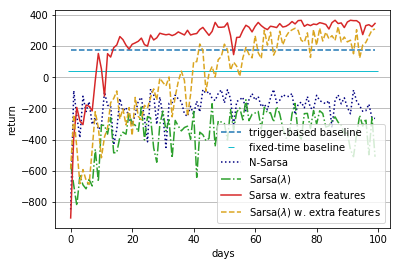

In [7]:
# Oven Coffee {Sarsa, Sarsa ExtraFeatures, etrace}

plt.plot(trigger_baseline_avg_oc, '--', color='C0')
plt.plot(fixed_baseline_avg_oc, '_', color='C9')
plt.plot(ocs_avg, ':', color='navy')
plt.plot(oce_avg, '-.', color='C2')
plt.plot(ocse_avg, '-', color='C3')
plt.plot(ocee_avg, '--', color='goldenrod')

# plt.title('Oven & Coffee Rule')
plt.legend(['trigger-based baseline', 'fixed-time baseline', 'N-Sarsa', 'Sarsa($\lambda$)','Sarsa w. extra features','Sarsa($\lambda$) w. extra features'], loc='lower right')
plt.xlabel('days')
plt.ylabel('return')
ax = plt.gca()
ax.yaxis.grid(True)
plt.savefig('oven_coffee_1.pdf', format='pdf')
plt.show()


In [167]:
CUTOFF_O = 100
TRIGGER_BASED_BASELINE_REWARD_O = 83.5
FIXED_TIME_BASELINE_REWARD_O = 95.5

# Oven Sarsa
os0 = [-328.5, 143.75, 127.25, 108.5, 127.25, 154.25, -367.5, 128.0, 127.25, 125.75, 129.5, 128.75, 131.0, 125.0, 107.75, 128.75, 129.5, 125.0, 128.0, 136.25, 130.25, 125.75, 135.5, 128.75, 126.5, 126.5, 124.25, 130.25, 129.5, 129.5, 122.0, 126.5, 127.25, 126.5, 102.5, 95.0, 128.0, 126.5, 127.25, 125.75, 101.75, 138.5, 115.25, 10.25, 129.5, 134.0, 128.0, 125.75, 114.5, 125.0, 127.25, 127.25, 111.5, 126.5, 128.0, 101.75, 97.25, 98.75, 108.5, 128.0, 119.0, 113.0, 127.25, 128.0, 114.5, 117.5, 128.0, 122.75, 128.75, 126.5, 125.0, 128.75, 135.5, 128.0, 128.0, 133.25, 130.25, 136.25, 120.5, 130.25, 128.0, 125.75, 107.0, 126.5, 102.5, 119.0, 128.75, 119.0, 127.25, 127.25, 126.5, 128.0, 133.25, 128.0, 125.75, 129.5, 131.75, 128.75, 102.5, 130.25, 127.25, 127.25, 125.75, 126.5, 86.75, 123.5, 128.75, 131.0, 128.0, 57.5, 100.25, 129.5, 123.5, 127.25, 50.75, 131.75, 131.0, 117.5, 130.25, 121.25, 124.25, 126.5, 124.25, 107.0, 129.5, 131.0, 131.0, 131.0, 129.5, 130.25, 130.25, 125.75, 128.0, 115.25, 129.5, 132.5, 135.5, 130.25, 98.75, 128.75, 125.0, 126.5, 129.5, 137.0, 127.25, 128.0, 131.0, 125.75, 123.5, 127.25, 106.25, 137.0, 80.75, 128.0, 127.25, 117.5, 116.75, 126.5, 128.75, 128.75, 129.5, 131.0, 127.25, 128.0, 130.25, 125.75, 137.75, 129.5, 128.0, 128.75, 131.75, 128.75, 113.75, 129.5, 125.0, 138.5, 134.75, 125.75, 125.75, 123.5, 124.25, 137.75, 130.25, 125.75, 130.25, 129.5, 137.0, 130.25, 125.75, 130.25, 125.0, 131.75, 128.75, 132.5, 127.25, 126.5, 129.5, 135.5, 128.75, 128.0]
os1 = [-321.75, 128.0, 132.5, 129.5, 125.75, 128.0, 159.5, 134.75, 126.5, 135.5, 137.0, 136.25, 128.75, 125.75, 135.5, 131.75, -125.5, 120.5, 33.5, 125.0, 128.75, 124.25, 126.5, 126.5, 128.0, 128.75, 128.0, 128.75, 128.75, 126.5, 123.5, 124.25, 127.25, 138.5, 104.75, 72.5, 130.25, 128.0, 111.5, 116.75, 116.0, 77.75, 125.0, 125.75, 38.0, 58.25, 60.5, 97.25, 129.5, 118.25, 115.25, 116.0, 112.25, 126.5, 131.75, 112.25, 71.75, 129.5, 132.5, 75.5, 128.0, 128.75, 125.0, 130.25, 129.5, 126.5, 123.5, 127.25, 129.5, 134.0, 128.0, 125.75, 126.5, 137.0, 128.0, 101.75, 101.75, 128.75, 105.5, 127.25, 125.75, 100.25, 130.25, 137.75, 127.25, 128.0, 131.75, 115.25, 125.0, 128.75, 125.0, 128.75, 102.5, 118.25, 131.75, 127.25, 122.75, 71.0, 127.25, 131.75, 125.0, 125.75, 127.25, 128.75, 129.5, 94.25, 133.25, 129.5, 129.5, 130.25, 138.5, 78.5, 126.5, 126.5, 95.0, 128.75, 125.75, 129.5, 134.0, 116.75, 95.75, 134.0, 131.75, 78.5, 129.5, 128.0, 134.75, 128.75, 128.0, 129.5, 130.25, 128.0, 129.5, 124.25, 74.75, 130.25, 128.75, 127.25, 128.75, 71.75, 134.75, 134.0, 122.0, 128.75, 126.5, 128.0, 128.75, 128.75, 131.0, 86.75, 128.75, 122.75, 132.5, 128.75, 131.75, 128.0, 131.0, 126.5, 128.0, 128.75, 128.75, 124.25, 129.5, 129.5, 99.5, 71.75, 121.25, 124.25, 131.75, 130.25, 125.0, 126.5, 119.75, 124.25, 125.75, 125.75, 128.75, 113.0, 95.75, 106.25, 122.0, 126.5, 54.5, 125.0, 129.5, 125.0, 126.5, 122.75, 134.0, 132.5, 128.0, 131.0, 128.75, 128.0, 125.75, 125.75, 124.25, 126.5, 128.0, 128.75]
os2 = [-114.25, 141.5, 125.0, 113.0, 137.75, 114.5, 133.25, 129.5, 131.75, 127.25, 131.0, 130.25, 131.75, 125.0, 134.75, 124.25, 135.5, 126.5, 129.5, 128.0, 135.5, 129.5, 134.0, 126.5, 137.75, 130.25, 130.25, 128.0, 128.75, 133.25, 127.25, 110.0, 110.75, 89.0, 101.0, 119.0, 134.0, 116.75, 133.25, 89.0, 125.75, 134.0, 127.25, 129.5, 135.5, 137.0, 128.75, 134.0, 128.0, 129.5, 125.75, 126.5, 128.75, 122.0, 124.25, 132.5, 128.0, 123.5, 128.75, 129.5, 124.25, 137.75, 101.75, 129.5, 128.0, 125.75, 159.5, 137.75, 105.5, 131.75, 128.75, 103.25, 127.25, 128.75, 101.0, 137.75, 130.25, 130.25, 131.0, 128.75, 125.75, 126.5, 137.75, 137.75, 124.25, 135.5, 134.75, 131.0, 129.5, 128.0, 114.5, 128.75, 137.75, 134.75, 143.0, 119.0, 128.75, 132.5, 129.5, 132.5, 128.75, 134.75, 139.25, 125.75, 130.25, 128.0, 126.5, 135.5, 128.75, 134.0, 137.0, 125.75, 128.0, 128.75, 134.0, 127.25, 131.0, 137.0, 128.75, 128.75, 135.5, 135.5, 134.0, 133.25, 134.0, 122.0, 122.75, 128.0, 127.25, 127.25, 127.25, 134.0, 122.75, 130.25, 128.75, 128.0, 137.75, 128.75, 126.5, 126.5, 137.75, 126.5, 130.25, 126.5, 128.75, 129.5, -87.0, 161.75, 133.25, 135.5, 135.5, 113.0, 125.0, 121.25, 122.0, 107.75, 115.25, 100.25, 108.5, 103.25, 137.75, 135.5, 103.25, 126.5, 137.0, 125.75, 126.5, 128.75, 128.75, 125.0, 134.0, 134.0, 128.0, 137.0, 137.0, 133.25, 128.75, 134.75, 128.75, 129.5, 126.5, 123.5, 129.5, 130.25, 127.25, 134.75, 136.25, 131.75, 129.5, 128.75, 132.5, 128.0, 128.0, 129.5, 128.0, 128.0, 137.0, 129.5, 126.5, 122.0]
os3 = [-100.0, 131.75, 149.0, 125.75, 127.25, 125.75, 127.25, 125.0, 131.0, 124.25, 134.0, 129.5, 129.5, 130.25, 137.0, 128.0, 128.0, -355.5, 128.75, 128.0, 122.0, 79.25, 126.5, 128.75, 101.75, 74.0, 131.75, 124.25, 134.75, 130.25, 128.0, 125.0, 131.75, 127.25, 130.25, 124.25, 119.0, 119.0, 97.25, 134.0, 112.25, 101.0, 125.75, 101.0, 116.75, 121.25, 125.75, 118.25, 126.5, 98.0, 130.25, 129.5, 116.0, 121.25, 129.5, 129.5, 115.25, 65.75, 121.25, 130.25, 118.25, 110.0, 131.75, 123.5, 74.0, 107.75, 126.5, 108.5, 134.0, 130.25, 119.0, 125.0, 128.0, 128.0, 119.0, 134.0, 131.75, 125.0, 109.25, 94.25, 134.75, 127.25, 127.25, 137.0, 129.5, 127.25, 119.0, 88.25, 130.25, 134.75, 127.25, 125.75, 127.25, 129.5, 134.0, 132.5, 131.0, 129.5, 125.0, 129.5, 124.25, 129.5, 128.0, 128.75, 128.0, 126.5, 130.25, 129.5, 83.75, 88.25, 130.25, 128.0, 126.5, 133.25, 125.0, 128.75, 131.0, 129.5, 125.75, 129.5, 127.25, 135.5, 130.25, 127.25, 53.0, 131.0, 128.75, 125.75, 124.25, 135.5, 126.5, 126.5, 129.5, 123.5, 127.25, 131.0, 128.75, 137.0, 134.0, 124.25, 129.5, 128.75, 116.0, 130.25, 66.5, 128.75, 70.25, 119.75, 132.5, 125.75, 128.75, 126.5, 133.25, 112.25, 136.25, 131.0, 135.5, 128.0, 132.5, 128.75, 131.75, 124.25, 128.75, 130.25, 122.75, 116.0, 127.25, 130.25, 128.75, 137.0, 20.0, 126.5, 126.5, 131.75, 128.75, 128.75, 129.5, 128.75, 116.75, 127.25, 137.0, 128.0, 128.75, 127.25, 125.75, 130.25, 119.75, 128.0, 130.25, 95.0, 129.5, 126.5, 131.75, 122.75, 127.25, 127.25, 128.0, 129.5, 124.25, 129.5]
os4 = [-110.5, 137.0, 125.75, 116.75, 108.5, 130.25, 128.75, 129.5, 129.5, 130.25, 128.75, 128.0, 137.0, 125.75, 131.0, 128.0, 128.75, 126.5, 130.25, 131.0, 126.5, 127.25, 120.5, 129.5, 134.0, 129.5, 128.0, 135.5, 128.0, 134.0, 126.5, 134.0, 134.75, 132.5, 130.25, 134.0, 125.75, 128.0, 126.5, 136.25, 127.25, -351.0, 125.75, 127.25, 125.75, 128.0, 125.75, 131.0, 125.75, 128.0, 132.5, 129.5, 127.25, 85.25, 125.0, 130.25, 131.0, 130.25, 130.25, 128.0, 127.25, 129.5, 106.25, 125.75, 132.5, 127.25, 89.75, 136.25, 30.5, 125.0, 127.25, 66.5, 136.25, 136.25, 83.0, 128.75, 126.5, 116.0, 129.5, 130.25, 27.5, 77.0, 131.0, 91.25, 130.25, 128.0, 124.25, 127.25, 128.0, 138.5, 86.75, 88.25, 131.0, 123.5, 62.0, 128.0, 133.25, 131.0, 129.5, 68.0, 83.0, 122.0, 131.0, 128.75, 128.0, 118.25, 131.0, 136.25, 116.75, 128.75, 124.25, 128.0, 72.5, 124.25, 128.0, 131.0, 135.5, 128.0, 48.5, 128.0, 128.0, 130.25, 127.25, 123.5, 128.75, 89.0, 128.0, 125.75, 107.75, 66.5, 116.75, 99.5, 80.75, 101.75, 115.25, 137.0, 131.75, 131.0, 116.75, 124.25, 131.0, 116.75, 131.75, 102.5, 116.75, 124.25, 146.0, 124.25, 131.0, 131.75, 117.5, 131.0, 119.75, 38.0, 63.5, 116.75, 118.25, 126.5, 128.75, 122.75, 51.5, 78.5, 132.5, 128.0, 128.75, 56.0, 128.0, 133.25, 128.75, 122.0, 138.5, 87.5, 127.25, 107.75, 126.5, 120.5, 128.75, 81.5, 131.0, 128.0, 125.75, 122.0, 50.0, 128.75, 128.0, 128.0, 91.25, 129.5, 126.5, 125.0, 134.75, 126.5, 127.25, 134.75, 128.75, 129.5, 126.5, 128.75, 71.75, 130.25]
os5 = [-79.0, 146.0, 136.25, 125.75, -142.75, 125.75, 120.5, 127.25, 128.75, 122.75, 128.75, 127.25, 122.0, 126.5, 107.75, 129.5, 130.25, 129.5, 128.0, 129.5, 136.25, 128.0, 129.5, 128.0, 129.5, 127.25, 128.0, 76.25, 128.75, 129.5, 125.75, 126.5, 135.5, 128.75, 126.5, 131.75, 127.25, 33.5, 125.75, 128.75, 129.5, 120.5, 129.5, 124.25, 136.25, 110.0, 120.5, 88.25, 110.75, 109.25, 129.5, 116.75, 136.25, 135.5, 107.0, 116.75, 107.75, 128.75, 128.0, 120.5, 131.0, 124.25, 126.5, 127.25, 117.5, 137.75, 124.25, 126.5, 119.0, 125.75, 134.75, 125.0, 120.5, 131.75, 127.25, 128.75, 128.75, 121.25, 106.25, 119.75, 128.75, 124.25, 126.5, 129.5, 119.75, 134.75, 124.25, 65.75, 131.0, 125.0, 128.75, 129.5, 121.25, 128.75, 131.0, 130.25, 127.25, 122.0, 128.75, 126.5, 130.25, 133.25, 117.5, 124.25, 128.75, 130.25, 131.0, 126.5, 45.5, 122.0, 126.5, 128.0, 124.25, 128.0, 126.5, 99.5, 128.75, 74.0, 125.75, 128.75, 131.75, 128.75, 135.5, 128.75, 137.0, 136.25, 127.25, 127.25, 135.5, 109.25, 126.5, 125.75, 131.0, 134.75, 126.5, 128.0, 128.75, 129.5, 128.75, 137.0, 136.25, 131.0, 129.5, 128.0, 131.0, 128.0, 125.0, 137.0, 131.0, 128.0, 127.25, 139.25, 129.5, 119.0, 128.0, 128.75, 130.25, 128.0, 131.0, 127.25, 149.75, 128.0, 130.25, 127.25, 128.0, 130.25, 137.75, 113.75, 125.75, 127.25, 129.5, 125.75, 127.25, 136.25, 130.25, 138.5, 114.5, 128.75, 131.0, 87.5, 128.0, 134.0, 130.25, 126.5, 128.0, 138.5, 139.25, 127.25, 131.75, 125.0, 135.5, 126.5, 133.25, 128.0, 126.5, 131.0, 127.25, 128.0, 131.75, 122.0]

os_data = [os0, os1, os2, os3, os4, os5]
os_data = [np.array(d)[:CUTOFF_O] for d in os_data]
os_avg = sum(os_data)/6

# Oven Sarsa ExtraFeatures
ose0 = [-285.0, 191.0, 181.25, 165.5, 180.5, 168.5, 173.0, 167.75, 170.0, 174.5, 172.25, 176.0, 175.25, 177.5, 182.75, 183.5, 184.25, 183.5, 182.75, 183.5, 184.25, 183.5, 178.25, 185.0, 181.25, 181.25, 183.5, 179.0, 182.0, 184.25, 183.5, 179.0, 182.75, 179.75, 182.75, 181.25, 182.75, 174.5, 183.5, 183.5, 181.25, 180.5, 183.5, 179.0, 182.0, 182.0, 182.0, 181.25, 177.5, 178.25, 183.5, 178.25, 181.25, 182.0, 179.75, 183.5, 187.25, 182.75, 182.75, 183.5, 181.25, 182.75, 182.0, 185.75, 182.0, 184.25, 182.75, 183.5, 182.0, 185.0, 182.75, 183.5, 182.75, 183.5, 179.75, 182.75, 182.75, 182.0, 183.5, 183.5, 181.25, 184.25, 184.25, 180.5, 183.5, 185.0, 180.5, 183.5, 184.25, 182.0, 181.25, 183.5, 181.25, 181.25, 183.5, 180.5, 182.0, 177.5, 183.5, 184.25, 182.0, 182.0, 183.5, 184.25, 182.0, 182.75, 183.5, 181.25, 182.0, 184.25, 180.5, 182.0, 182.0, 182.0, 182.0, 182.0, 183.5, 183.5, 183.5, 182.75, 182.75, 185.0, 182.75, 181.25, 182.0, 185.0, 183.5, 167.75, 179.75, 184.25, 185.0, 181.25, 177.5, 184.25, 182.75, 182.0, 180.5, 179.75, 182.75, 183.5, 179.75, 174.5, 183.5, 183.5, 182.75, 178.25, 179.0, 181.25, 183.5, 184.25, 182.75, 182.0, 182.75, 182.0, 184.25, 181.25, 182.75, 182.75, 180.5, 182.75, 185.0, 184.25, 181.25, 177.5, 184.25, 180.5, 184.25, 180.5, 183.5, 182.0, 182.75, 180.5, 185.0, 183.5, 183.5, 181.25, 183.5, 185.0, 182.75, 182.75, 184.25, 179.75, 182.75, 183.5, 185.0, 178.25, 182.0, 182.75, 184.25, 185.0, 174.5, 182.75, 185.0, 182.75, 184.25, 180.5, 182.75, 184.25, 182.75, 184.25]
ose1 = [-285.0, 192.5, 182.75, 169.25, 173.0, 175.25, 173.75, 173.0, 169.25, 174.5, 177.5, 177.5, 178.25, 180.5, 182.0, 183.5, 182.0, 184.25, 184.25, 184.25, 182.75, 183.5, 182.75, 184.25, 182.75, 185.0, 179.0, 185.0, 185.0, 184.25, 182.0, 183.5, 182.75, 182.0, 182.0, 185.0, 184.25, 185.75, 184.25, 185.0, 184.25, 183.5, 184.25, 182.75, 185.0, 184.25, 182.75, 184.25, 183.5, 185.0, 183.5, 183.5, 176.0, 175.25, 182.0, 180.5, 181.25, 184.25, 182.75, 184.25, 184.25, 183.5, 184.25, 183.5, 177.5, 185.0, 179.0, 184.25, 182.75, 185.75, 182.75, 181.25, 184.25, 185.0, 182.0, 185.0, 182.75, 184.25, 184.25, -294.75, 183.5, 184.25, 185.0, 184.25, 183.5, 184.25, 184.25, 182.0, 182.75, 182.75, 183.5, 183.5, 179.75, 183.5, 182.75, 184.25, 184.25, 179.75, 184.25, 185.0, 183.5, 184.25, 182.75, 181.25, 183.5, 185.0, 180.5, 183.5, 183.5, 183.5, 185.75, 184.25, 185.0, 185.0, 182.0, 184.25, 182.0, 182.75, 183.5, 184.25, 184.25, 181.25, 181.25, 183.5, 184.25, 180.5, 183.5, 184.25, 182.75, 183.5, 182.0, 185.0, 182.0, 184.25, 183.5, 184.25, 185.75, 185.0, 184.25, 178.25, 183.5, 183.5, 182.75, 185.0, 183.5, 182.75, 184.25, 183.5, 186.5, 181.25, 184.25, 182.75, 184.25, 183.5, 183.5, 183.5, 184.25, 184.25, 185.0, 183.5, 185.0, 185.0, 185.0, 184.25, 183.5, 184.25, 185.0, 184.25, 180.5, 185.0, 183.5, 184.25, 183.5, 180.5, 183.5, 183.5, 185.0, 185.0, 182.75, 183.5, 184.25, 183.5, 184.25, 182.75, 182.75, 182.75, 182.75, 184.25, 182.75, 185.75, 183.5, 183.5, 184.25, 184.25, 183.5, 184.25, 185.0, 179.75, 182.75, 184.25]
ose2 = [-288.75, 102.5, 189.5, 181.25, 176.0, 185.75, 173.75, 173.0, 172.25, 171.5, 173.0, 173.0, 167.0, 178.25, 173.0, 184.25, 179.75, 182.75, 180.5, 184.25, 183.5, 184.25, 185.0, 185.0, 182.0, 183.5, 184.25, 185.0, 183.5, 181.25, 180.5, 182.75, 184.25, 183.5, 183.5, 182.0, 181.25, 180.5, 186.5, 184.25, 182.0, 182.0, 185.75, 182.75, 182.75, 182.75, 182.0, 182.75, 183.5, 182.75, 183.5, 182.75, 182.75, 183.5, 184.25, 183.5, 177.5, 182.75, 181.25, 182.75, 184.25, 183.5, 183.5, 179.75, 183.5, 182.75, 182.75, 184.25, 181.25, 183.5, 180.5, 182.0, 183.5, 182.75, 184.25, 183.5, 183.5, 183.5, 180.5, 182.0, 182.0, 181.25, 179.75, 185.75, 182.0, 181.25, 184.25, 185.0, 183.5, 183.5, 181.25, 182.0, 182.0, 183.5, 184.25, 182.75, 182.75, 180.5, 182.75, 183.5, 183.5, 177.5, 182.75, 182.0, 182.75, 182.0, 182.75, 181.25, 184.25, 183.5, 183.5, -47.25, 184.25, 183.5, 179.0, 179.0, 182.75, 184.25, 182.0, 180.5, 182.0, 182.75, 183.5, 178.25, 177.5, 182.75, 181.25, 182.0, 183.5, 185.0, 185.0, 184.25, 179.75, 182.75, 182.75, 183.5, 183.5, 184.25, 177.5, 182.0, 182.75, 182.75, 173.75, 182.0, 183.5, 184.25, 179.0, 185.0, 185.75, 184.25, 181.25, 184.25, 182.75, 184.25, 182.0, 182.0, 183.5, 182.0, 182.75, 181.25, 182.75, 184.25, 181.25, 185.0, 183.5, 181.25, 184.25, 184.25, 183.5, 183.5, 182.75, 180.5, 180.5, 182.0, 181.25, 184.25, 178.25, 181.25, 179.75, 182.0, 182.75, 183.5, 182.75, 183.5, 182.75, 183.5, 179.75, 184.25, 183.5, 182.0, 182.75, 184.25, 182.0, 182.0, 179.0, 183.5, 182.0, 184.25, 179.0, 181.25]
ose3 = [-285.0, 162.5, 182.0, 164.75, 178.25, 176.0, 172.25, 173.75, 174.5, 182.75, 187.25, 185.75, 182.75, 188.0, 188.75, 188.0, 184.25, 186.5, 186.5, 185.75, 187.25, 186.5, 185.0, 185.75, 184.25, 188.0, 187.25, 187.25, 188.0, 186.5, 188.0, 186.5, 185.0, 185.0, 187.25, 186.5, 186.5, 187.25, 186.5, 186.5, 186.5, 187.25, 188.0, 188.0, 185.75, 187.25, 186.5, 186.5, 188.0, 185.75, 186.5, 185.75, 186.5, 187.25, 185.0, 188.75, 186.5, 186.5, 188.0, 186.5, 186.5, 186.5, 174.5, 87.5, 185.75, 188.75, 186.5, 188.0, 186.5, 185.75, 188.75, 185.75, 187.25, 185.0, 187.25, 188.75, 186.5, 186.5, 181.25, 186.5, 185.75, 179.75, 185.75, 185.75, 188.0, 186.5, 188.0, 188.75, 185.75, 183.5, 186.5, 187.25, 186.5, 186.5, 186.5, 187.25, 187.25, 186.5, 187.25, 188.0, 185.0, 183.5, -36.75, 187.25, 187.25, 185.75, 185.75, 185.75, 186.5, 185.0, 187.25, 188.0, 185.0, 179.75, 187.25, 184.25, 186.5, 188.75, 186.5, 187.25, 186.5, 186.5, 187.25, 188.0, 186.5, 185.75, 186.5, 186.5, 186.5, 184.25, 186.5, 187.25, 185.75, 186.5, 187.25, 187.25, 183.5, 185.75, 188.0, 185.0, 186.5, 188.0, 183.5, 188.0, 187.25, 186.5, 185.0, 188.75, 188.0, 186.5, 187.25, 186.5, 186.5, 186.5, 186.5, 183.5, 187.25, 186.5, 185.0, 188.0, 182.75, 186.5, 188.0, 184.25, 188.0, 187.25, 188.0, 187.25, 186.5, 185.0, 188.0, 188.0, 186.5, 188.0, 184.25, 185.75, 187.25, 184.25, 185.75, 184.25, 188.0, 188.0, 187.25, 188.0, 186.5, 187.25, 185.75, 185.75, 186.5, 183.5, 186.5, 187.25, 186.5, 185.75, 186.5, 186.5, 187.25, 186.5, 187.25, 186.5]
ose4 = [-285.0, -311.25, 192.5, 185.75, 161.0, 181.25, 169.25, 176.75, 168.5, 170.0, 173.0, 175.25, 180.5, 182.0, 179.75, 182.0, 182.75, 178.25, 179.75, 182.0, 182.75, 180.5, 183.5, 182.0, 182.75, 181.25, 176.0, 176.75, 181.25, 181.25, 179.0, 182.75, 183.5, 183.5, 183.5, 179.75, 179.75, 178.25, 184.25, 182.0, 185.0, 183.5, 182.75, 180.5, 182.75, 182.75, 181.25, 173.75, 182.0, 181.25, 177.5, 179.0, 181.25, 184.25, 182.75, 182.0, 182.75, 182.75, 182.0, 183.5, 175.25, 173.75, 179.75, 177.5, 183.5, 184.25, 182.0, 182.75, 182.0, 179.75, 182.0, 181.25, 182.0, 184.25, 182.75, 182.0, 183.5, 183.5, 181.25, 180.5, 182.0, 179.75, 183.5, 182.75, 179.75, 182.75, 181.25, 179.0, 182.75, 181.25, 183.5, 181.25, 182.0, 183.5, 182.0, 182.75, 183.5, 180.5, 169.25, 182.0, 179.75, 183.5, 182.0, 181.25, 181.25, 183.5, 182.0, 182.0, 180.5, 181.25, 178.25, 182.75, 183.5, 182.75, 182.75, 182.75, 182.75, 181.25, 182.75, 179.75, 182.0, 182.0, 181.25, 176.75, 182.0, 183.5, 182.75, 183.5, 184.25, 182.75, 182.75, 183.5, 180.5, 182.75, 182.0, 182.75, 182.75, 182.75, 182.0, 182.75, 179.0, 182.75, 183.5, 182.0, 182.0, 182.0, 181.25, 182.75, 182.75, 182.0, 178.25, 180.5, 176.75, 183.5, 182.75, 183.5, 179.75, 181.25, 182.0, 182.75, 179.75, 182.0, 181.25, 179.75, 182.75, 182.75, 182.75, 181.25, 181.25, 183.5, 179.0, 182.0, 181.25, 183.5, 179.75, 184.25, 183.5, 183.5, 181.25, 182.0, 183.5, 182.0, 182.0, 182.75, 182.0, 182.75, 177.5, 183.5, 182.75, 181.25, 183.5, 182.75, 182.75, 179.75, 182.75, 182.75, 182.75, 181.25, 182.75, 183.5]
ose5 = [-285.0, 190.25, 184.25, 173.0, 176.75, 178.25, 175.25, 175.25, 172.25, 172.25, 179.75, 180.5, 182.75, 187.25, 181.25, 188.75, 185.75, 187.25, 187.25, 185.0, 186.5, 188.0, 184.25, 188.0, 184.25, 186.5, 187.25, 185.0, 188.0, 186.5, 187.25, 185.75, 187.25, 186.5, 187.25, 188.75, 186.5, 188.0, 187.25, 186.5, 186.5, 186.5, 185.0, 185.75, 187.25, 187.25, 184.25, 187.25, 187.25, 183.5, 185.0, 185.0, 187.25, 188.0, 176.0, 182.75, 182.0, 186.5, 176.75, 185.75, 181.25, 188.0, 186.5, 185.75, 183.5, 186.5, 185.75, 184.25, 188.75, 186.5, 187.25, 187.25, 188.0, 188.0, 188.0, 187.25, 187.25, 187.25, 187.25, 188.0, 186.5, 184.25, 187.25, 185.75, 182.75, 188.0, 188.0, 187.25, 186.5, 185.0, 187.25, 185.75, 183.5, 188.0, 188.0, 186.5, 180.5, 185.0, 185.75, 185.75, 185.75, 187.25, 185.75, 187.25, 187.25, 188.0, 185.75, 187.25, 187.25, 185.75, 188.0, 186.5, 185.0, 185.75, 185.75, 187.25, 185.0, 188.0, 185.75, 185.75, 187.25, 186.5, 188.0, 187.25, 186.5, 186.5, 186.5, 187.25, 187.25, 186.5, 186.5, 188.0, 186.5, 188.75, 187.25, 187.25, 187.25, 188.0, 186.5, 188.0, 188.75, 186.5, 184.25, 188.0, 188.0, 185.75, 187.25, 187.25, 186.5, 185.0, 188.75, 185.0, 185.75, 188.0, 188.0, 184.25, 186.5, 187.25, 183.5, 185.75, 187.25, 176.75, 186.5, 185.0, 186.5, 184.25, 187.25, 186.5, 188.0, 187.25, 188.0, 179.0, 183.5, 186.5, 186.5, 180.5, 188.75, 187.25, 185.75, 185.0, 185.75, 187.25, 188.0, 187.25, 185.75, 184.25, 188.75, 185.75, 187.25, 186.5, 186.5, 187.25, 185.0, 187.25, 187.25, 188.75, 188.0, 187.25, 188.0, 185.75]

ose_data = [ose0, ose1, ose2, ose3, ose4, ose5]
ose_data = [np.array(d)[:CUTOFF_O] for d in ose_data]
ose_avg = sum(ose_data)/6

# Oven etrace
oe0 = [-328.5, -311.25, -347.25, 138.5, 154.25, 132.5, 182.0, 127.25, 134.75, 122.75, 130.25, 161.0, 182.0, 152.75, 140.0, 140.75, 146.0, 137.0, 172.25, 182.75, -302.25, 161.0, -336.75, 38.0, 136.25, 128.0, 136.25, 136.25, 135.5, 139.25, 126.5, 128.0, 132.5, 134.75, 107.0, 117.5, 136.25, 108.5, 137.0, 141.5, 137.75, 135.5, 140.0, 140.75, 135.5, 135.5, 133.25, 134.75, 134.75, 141.5, 131.75, 141.5, 133.25, 134.0, 138.5, 134.75, 137.0, 135.5, 129.5, 131.75, 143.75, 68.0, 128.0, 137.75, 134.0, 137.0, 136.25, 114.5, 85.25, 132.5, 130.25, 133.25, 136.25, 135.5, 136.25, 131.0, 133.25, 134.0, 136.25, 133.25, 134.75, 138.5, 121.25, 102.5, 131.75, 139.25, 95.75, 137.0, 138.5, 136.25, 137.75, 133.25, 135.5, 98.0, 137.0, 134.75, 139.25, 140.0, 142.25, 137.0, 132.5, 133.25, 136.25, 136.25, 134.0, 137.0, 135.5, 131.75, 140.0, 62.75, 133.25, 130.25, 134.0, 140.75, 137.0, 135.5, 139.25, 144.5, 137.75, 136.25, 134.75, 135.5, 137.0, 144.5, 135.5, 134.75, 140.75, 137.0, 134.0, 137.0, 137.75, 134.0, 137.0, 143.0, 136.25, 99.5, 140.75, 131.0, 143.0, 138.5, 137.0, 135.5, 137.75, 133.25, 134.0, 134.75, 138.5, 143.0, 142.25, 136.25, 135.5, 141.5, 67.25, 143.75, 126.5, 136.25, 137.0, 134.75, 135.5, 140.0, 138.5, 137.0, 134.0, 136.25, 138.5, 143.0, 140.0, 137.0, 143.75, 131.75, 134.75, 133.25, 136.25, 144.5, 133.25, 133.25, 92.0, 143.0, 131.75, 132.5, 137.0, 144.5, 139.25, 138.5, 132.5, 135.5, 140.0, 137.75, 137.0, 134.75, 135.5, 134.75, 141.5, 137.75, 137.75, 138.5, 141.5, 141.5, 135.5, 136.25]
oe1 = [-329.25, 58.25, 128.75, 134.75, 135.5, 126.5, 136.25, 36.5, -298.5, -327.75, 50.0, -297.75, -331.5, 125.75, 133.25, 125.0, 131.0, 136.25, 119.75, 128.75, 126.5, 128.75, 133.25, 128.75, 135.5, 131.75, 130.25, 129.5, 127.25, 130.25, 128.0, 86.0, 124.25, 137.75, 121.25, 127.25, 131.75, 127.25, 65.75, 122.0, 128.0, 128.75, 153.5, 126.5, 132.5, 132.5, 129.5, 134.75, 135.5, 121.25, 131.75, 129.5, 128.0, 126.5, 128.0, 125.75, 128.75, 120.5, 135.5, 109.25, 130.25, 122.75, 128.0, 126.5, 128.75, 131.0, 135.5, 120.5, 128.75, 128.0, 127.25, 136.25, 128.0, 122.0, 122.75, 128.75, 123.5, 126.5, 126.5, 130.25, 130.25, 128.75, 130.25, 119.75, 130.25, 125.75, 130.25, 131.0, 128.0, 129.5, 129.5, 127.25, 126.5, 128.0, 128.0, 128.0, 128.0, 131.75, 113.0, 128.75, 134.75, 124.25, 121.25, 123.5, 128.0, 125.75, 130.25, 135.5, 124.25, 128.0, 134.75, 126.5, 135.5, 134.75, 126.5, 97.25, 130.25, 132.5, 123.5, 131.75, 128.75, 151.25, -309.0, 128.75, 148.25, 136.25, 128.75, 134.0, 134.0, 131.75, 134.0, 131.75, 118.25, 132.5, 136.25, 140.75, 125.75, 125.75, 128.0, 129.5, 131.0, 155.75, 136.25, 124.25, 129.5, 126.5, 125.75, 125.0, 128.0, 127.25, 126.5, 131.0, 129.5, 134.0, 128.0, 128.0, 125.0, 128.75, 127.25, 127.25, 135.5, 130.25, 123.5, 165.5, 128.75, 128.75, 137.75, 127.25, 127.25, 127.25, 130.25, 128.75, 128.75, 166.25, 143.0, 136.25, 126.5, 138.5, 138.5, 159.5, 149.75, 180.5, -309.0, 129.5, 157.25, 169.25, 139.25, 182.75, 128.75, 129.5, 146.75, -345.0, 39.5, 122.0, 132.5, 150.5, 128.75, 89.0, -349.5, 131.0]
oe2 = [-330.0, -340.5, 122.75, 127.25, 132.5, 134.0, 85.25, 128.0, 124.25, 123.5, 33.5, 130.25, 135.5, 137.0, 133.25, 130.25, -335.25, 77.0, 82.25, 143.75, 134.0, 131.75, 137.75, 133.25, 136.25, 136.25, 136.25, 136.25, 133.25, 133.25, 135.5, 131.0, 33.5, 137.75, 128.0, 139.25, 129.5, 74.0, 134.0, 136.25, 128.75, 133.25, 133.25, 139.25, 135.5, 139.25, 137.75, 140.0, 141.5, 135.5, 136.25, -57.25, 134.75, 37.25, 139.25, 19.25, 164.75, 139.25, 115.25, 137.75, 136.25, 136.25, 135.5, 121.25, 130.25, 137.0, 122.0, 134.75, 36.5, 35.75, 56.75, 139.25, 126.5, 134.75, 133.25, 129.5, 128.0, 129.5, 127.25, 134.75, 128.0, 125.75, 89.75, 38.75, 128.75, 127.25, 131.75, 25.25, 110.0, 26.75, 136.25, -327.75, 93.5, 128.0, 127.25, 134.0, 134.0, 129.5, 43.25, 122.75, 34.25, 136.25, 39.5, 130.25, 129.5, 138.5, 122.75, 89.0, -331.5, 131.75, 68.75, 136.25, 134.0, 134.75, 132.5, 116.75, 122.75, 19.25, 134.75, 120.5, 131.75, 129.5, 130.25, 128.75, 128.0, 20.0, 139.25, 36.5, 151.25, 129.5, 128.75, 135.5, 135.5, 125.75, 31.25, 128.0, 125.0, 163.25, 47.0, 75.5, 33.5, 133.25, 28.25, 22.25, 119.75, 134.75, -339.0, 41.75, 28.25, 116.75, -369.75, -327.75, 119.75, 128.75, 137.75, 128.75, 132.5, 137.0, 131.75, 128.0, 133.25, 135.5, 126.5, 80.0, 127.25, 128.0, 130.25, 124.25, 124.25, 47.0, 124.25, 131.0, 131.75, 123.5, 125.75, 126.5, 129.5, 120.5, 126.5, 128.0, 125.0, 128.0, 125.75, 134.75, 125.0, 32.0, 130.25, -38.5, 126.5, 21.5, 130.25, 131.0, 123.5, 58.25, 124.25, 2.0, 127.25, 137.75, 133.25, 132.5]
oe3 = [-327.75, 38.0, 135.5, -312.0, -311.25, -296.25, 127.25, 182.75, 146.75, 145.25, 143.0, 136.25, 186.5, 130.25, 98.75, 137.0, 134.75, 146.75, -304.5, 164.0, 188.0, 189.5, 186.5, -336.75, 152.75, -330.75, 132.5, 123.5, 91.25, 129.5, 136.25, 129.5, 124.25, 131.0, 131.0, 41.0, -332.25, 71.75, 137.75, 137.75, 134.75, 143.75, 137.75, 92.0, 137.0, 135.5, 140.0, 134.75, 94.25, 139.25, 137.0, 137.0, 134.0, 132.5, -385.5, 42.5, -23.5, 138.5, 137.75, 134.0, 137.0, 139.25, 129.5, 58.25, 13.25, 134.0, 135.5, 136.25, 134.0, 135.5, 137.0, 134.75, 38.0, 137.0, 53.0, 28.25, 42.5, 140.0, 135.5, 137.0, 134.0, 131.0, 7.25, 137.0, 39.5, 57.5, 20.75, 124.25, 41.75, 20.75, 11.75, 34.25, 131.75, 92.75, 137.75, 132.5, 137.75, 50.75, 34.25, 62.0, 136.25, 71.0, 134.75, 38.75, 93.5, 69.5, 136.25, 128.75, 133.25, 135.5, 137.0, 20.75, 137.0, 125.0, 43.25, 137.0, 134.75, 104.75, 35.0, 41.0, 42.5, 138.5, 21.5, 137.0, 131.75, 131.75, 36.5, 111.5, 126.5, 71.0, 135.5, 135.5, 127.25, 137.0, 25.25, 41.0, 67.25, 17.75, 77.75, 20.75, 32.75, 47.75, 55.25, 39.5, 29.75, 72.5, 145.25, 34.25, 23.0, 131.0, 91.25, 127.25, 128.0, 133.25, 129.5, 129.5, 2.0, 128.0, 55.25, 130.25, 133.25, 134.75, 129.5, 129.5, 14.0, 130.25, 130.25, 136.25, 136.25, 137.75, 136.25, 133.25, 135.5, 137.0, 134.75, 126.5, 131.75, 131.0, 134.0, 121.25, 136.25, 116.0, 74.75, 131.0, 131.0, 95.0, 135.5, 137.0, 131.75, 136.25, 136.25, 134.75, 135.5, 130.25, 90.5, 133.25, 131.75, 139.25, 137.0, 131.0]
oe4 = [-822.0, -490.0, -265.0, -122.0, -569.5, 110.5, -244.0, -172.75, -224.5, 89.5, -173.5, -296.5, -171.25, -254.75, 155.5, -56.75, 251.5, 227.5, -108.5, 18.25, 112.75, 50.5, 50.5, 171.25, 236.5, -206.5, 115.0, 209.5, 289.0, 285.25, 262.0, 115.75, 254.5, 161.5, 284.5, 216.25, 271.75, 263.5, 178.0, 245.5, 234.25, 220.0, 293.5, 322.75, 301.75, 232.0, 198.25, 336.25, 297.25, 313.75, 353.5, 328.0, 364.75, 362.5, -190.75, 144.25, 202.0, 349.75, 209.5, 184.75, 282.25, 343.0, 311.5, 267.25, 288.25, 352.75, 271.75, 355.0, 329.5, 308.5, 323.5, 366.25, 354.25, 369.25, 348.25, 370.0, 358.75, 372.25, 251.5, 287.5, 370.75, 318.25, 369.25, 297.25, 239.5, 363.25, 370.75, 345.25, 333.25, 373.0, 370.0, 369.25, 358.0, 369.25, 366.25, 302.5, 328.0, 306.25, 307.75, 366.25, 366.25, 362.5, 226.75, 370.75, 323.5, 372.25, 315.25, 371.5, 370.75, 365.5, 348.25, 369.25, 368.5, 370.75, 217.75, 349.75, 330.25, 367.0, 364.75, 333.25, 331.0, 283.0, 322.75, 370.0, 371.5, 355.75, 368.5, 328.75, 367.0, 348.25, 361.75, 339.25, 344.5, 371.5, 359.5, 362.5, 332.5, 360.25, 328.75, 366.25, 370.75, 360.25, 365.5, 370.75, 371.5, 373.75, 364.0, 367.75, 351.25, 370.75, 358.0, 371.5, 364.75, 362.5, 367.0, 230.5, 362.5, 364.75, 366.25, 370.0, 370.0, 373.0, 369.25, 371.5, 365.5, 367.0, 369.25, 367.0, 370.75, 361.75, 371.5, 238.75, 372.25, 373.0, 369.25, 363.25, 363.25, 367.0, 368.5, 360.25, 334.75, 367.75, 355.75, 370.75, 370.75, 292.0, 373.0, 351.25, 343.75, 372.25, 373.75, 368.5, 343.75, 370.75, 371.5, 367.0, 365.5, 371.5, 370.75, 335.5]
oe5 = [-948.75, -268.75, -160.75, -278.5, -176.5, -286.0, -226.0, -309.25, 49.0, 115.0, 12.25, 185.5, 222.25, 116.5, 209.5, 186.25, 244.75, 238.75, 232.75, 214.0, 232.0, 246.25, 229.0, 223.0, -2.0, 348.25, 317.5, 283.75, 327.25, 309.25, 306.25, 296.5, 307.0, 326.5, 352.75, 318.25, 347.5, 192.25, 346.75, 274.75, 277.0, 197.5, 355.75, 316.0, 355.0, 293.5, 305.5, 362.5, 349.0, 310.0, 312.25, 353.5, 294.25, 370.75, 339.25, 374.5, 326.5, 343.75, 376.75, 339.25, 376.0, 375.25, 323.5, 236.5, 343.0, 372.25, 375.25, 355.75, 377.5, 268.0, 373.75, 307.0, 366.25, 375.25, 359.5, 376.0, 280.0, 375.25, 376.0, 376.0, 376.75, 376.0, 353.5, 369.25, 373.75, 378.25, 378.25, 374.5, 372.25, 370.75, 375.25, 346.0, 361.75, 370.75, 367.0, 368.5, 345.25, 375.25, 177.25, 334.75, 373.0, 307.75, 187.0, 352.75, 380.5, 371.5, 378.25, 376.0, 362.5, 349.75, 373.75, 244.0, 367.75, 364.0, 340.75, 337.0, 365.5, 370.75, 367.75, 324.25, 378.25, 352.0, 364.75, 379.0, 340.75, 313.0, 313.0, 367.0, 346.0, 303.25, 365.5, 367.75, 375.25, 376.0, 356.5, 352.0, 364.0, 367.0, 363.25, 375.25, -777.75, 339.25, 364.75, 361.75, 359.5, 375.25, 345.25, 372.25, 364.0, 371.5, 373.0, 377.5, 372.25, 358.75, 376.75, 310.0, 382.75, 355.75, 359.5, 367.75, 381.25, 380.5, 380.5, 379.75, 373.0, 324.25, 367.0, 376.0, 376.75, 345.25, 376.0, 355.75, 368.5, 373.75, 368.5, 289.0, 315.25, 358.0, 358.75, 376.0, 375.25, 373.75, 367.0, 379.0, 360.25, 358.0, 376.0, 373.0, 302.5, 373.0, 366.25, 371.5, 380.5, 356.5, 365.5, 363.25, 203.5, 375.25, 372.25, 370.0]

oe_data = [oe0, oe1, oe2, oe3, oe4, oe5]
oe_data = [np.array(d)[:CUTOFF_O] for d in oe_data]
oe_avg = sum(oe_data)/6

# Oven etrace extraFeatures
oee0 = [-302.25, -331.5, -399.75, -362.25, 189.5, 95.75, 104.75, -354.0, 155.0, 77.75, 153.5, 176.75, 162.5, 177.5, 182.0, 179.75, 176.0, 185.0, 169.25, 181.25, 183.5, 174.5, 164.0, 179.75, 163.25, 188.0, 120.5, 187.25, 183.5, 184.25, 184.25, 180.5, 173.75, 188.0, 184.25, 185.75, 185.75, 185.0, 179.0, 185.75, 185.0, 186.5, 182.75, 185.75, 183.5, 187.25, 173.75, 182.75, 158.0, 186.5, 167.0, 162.5, 187.25, 179.0, 187.25, 173.75, 188.0, 186.5, 186.5, 187.25, 185.75, 187.25, 187.25, 185.0, 185.0, 185.0, 162.5, 183.5, 184.25, 185.75, -368.25, 188.0, 184.25, 182.0, 186.5, 185.75, 185.75, 188.0, 187.25, 186.5, 187.25, 184.25, 184.25, 186.5, 186.5, 184.25, 186.5, 184.25, 187.25, 186.5, 185.0, 185.75, 188.0, 188.0, 182.75, 187.25, 187.25, 185.75, 186.5, 182.75, 186.5, 188.0, 185.75, 184.25, 186.5, 183.5, 188.0, 185.0, 180.5, 185.75, 185.0, 188.0, 185.0, 187.25, 186.5, 178.25, 185.0, 187.25, 186.5, 187.25, 188.0, 187.25, 186.5, 186.5, 185.75, 186.5, 185.0, 180.5, 186.5, 179.75, 183.5, 185.75, 187.25, 187.25, 185.75, 185.75, 186.5, 183.5, 185.75, 187.25, 185.0, 186.5, 185.75, 185.0, 186.5, 183.5, 186.5, 185.75, 187.25, 188.0, 185.0, 185.0, 188.0, 187.25, 187.25, 188.75, 188.0, 179.0, 186.5, 185.75, 187.25, 186.5, 182.0, 170.75, 184.25, 184.25, 185.75, 185.75, 186.5, 186.5, 187.25, 187.25, 188.0, 187.25, 185.75, 187.25, 186.5, 187.25, 188.0, 185.75, 184.25, 185.75, 186.5, 186.5, 187.25, 185.75, 183.5, 183.5, 182.75, 185.75, 187.25, 186.5, 185.75, 185.75, 187.25, 188.0, 187.25, 179.0, 185.0, 185.75]
oee1 = [-301.5, 153.5, 60.5, 133.25, 101.75, 165.5, 164.75, 183.5, 94.25, 188.0, 169.25, 177.5, 185.0, 174.5, 161.75, 192.5, 191.0, 182.75, 192.5, 177.5, 179.75, 188.0, 191.0, 178.25, 192.5, 189.5, 168.5, 189.5, 187.25, 189.5, 187.25, 190.25, 191.75, 191.75, 185.75, 188.75, 188.0, 189.5, 189.5, 188.0, 191.0, 190.25, 179.0, 173.75, 191.0, 190.25, 175.25, 191.0, 188.75, 185.0, 189.5, 191.75, 184.25, 188.75, 188.0, 143.75, 189.5, 191.0, 191.75, 155.75, 191.0, 192.5, 160.25, 191.75, 190.25, 192.5, 191.75, 186.5, 191.0, 188.75, 189.5, 188.75, 191.0, 191.75, 190.25, 190.25, 185.75, 146.75, 191.0, 182.75, 190.25, 190.25, 191.0, 190.25, 190.25, 190.25, 189.5, 192.5, 192.5, 186.5, 190.25, 191.0, 189.5, 182.0, 191.0, 191.0, 190.25, 191.75, 190.25, 186.5, 191.75, 191.75, 191.0, 192.5, 191.0, 191.0, 188.75, 182.0, 188.75, 191.0, 178.25, 177.5, 191.75, 189.5, 190.25, 191.0, 188.0, 191.75, 190.25, 190.25, 189.5, 191.75, 189.5, 191.0, 190.25, 189.5, 187.25, 190.25, 190.25, 191.0, 187.25, 187.25, 188.75, 191.75, 190.25, 191.75, 191.0, 191.75, 189.5, 186.5, 188.0, 191.0, 191.0, 191.0, 191.75, 192.5, 190.25, 191.0, 189.5, 190.25, 179.75, 191.0, 190.25, 189.5, 191.0, 188.75, 190.25, 190.25, 191.0, 191.75, 189.5, 188.75, 188.0, 191.0, 188.75, 191.0, 190.25, 189.5, 191.0, 191.0, 188.75, 190.25, 191.0, 191.0, 188.0, 185.75, 190.25, 189.5, 191.75, 190.25, 188.75, 191.0, 191.75, 187.25, 189.5, 187.25, 191.0, 192.5, 189.5, 191.75, 191.75, 189.5, 188.75, 190.25, 191.0, 186.5, 190.25, 188.0, 191.0, 186.5]
oee2 = [-301.5, 170.0, 119.75, -320.25, 164.75, 112.25, 45.5, 162.5, 147.5, 96.5, 180.5, 168.5, 158.0, 161.0, 140.75, 180.5, 185.0, 183.5, 184.25, 187.25, 189.5, 179.75, 156.5, 188.0, 190.25, 190.25, 154.25, 166.25, 189.5, 182.75, 191.0, 189.5, 187.25, 182.75, 190.25, 191.75, 191.75, 190.25, 189.5, 185.75, 191.0, 188.0, 185.0, 185.75, 188.75, 191.0, 188.0, 191.75, 178.25, 191.0, 190.25, 188.75, 190.25, 186.5, 191.0, 191.0, 188.75, 187.25, 191.0, 188.0, 191.75, 191.0, 189.5, 183.5, 188.0, 188.0, 184.25, 191.0, 163.25, 191.0, 189.5, 187.25, 191.0, 191.0, 182.75, 188.75, 181.25, 188.75, 191.0, 192.5, 178.25, 188.75, 188.0, 182.75, 191.0, 186.5, 190.25, 189.5, 182.0, 191.0, 191.75, 186.5, 191.0, 182.75, 192.5, 187.25, 191.0, 179.0, 191.75, 189.5, 188.75, 190.25, 191.0, 191.0, 188.75, 191.75, 191.75, 190.25, 189.5, 188.75, 189.5, 189.5, 191.75, 189.5, 190.25, 190.25, 191.75, 191.0, 188.0, 190.25, 191.75, 184.25, 190.25, 190.25, 188.0, 191.0, 186.5, 189.5, 189.5, 182.0, 167.0, 189.5, 191.75, 188.0, 191.0, 190.25, 192.5, 186.5, 188.0, 191.0, 188.75, 191.75, 192.5, 185.0, 189.5, 191.75, 191.75, 190.25, 188.75, 192.5, 190.25, 190.25, 189.5, 188.75, 189.5, 191.75, 190.25, 189.5, 189.5, 191.0, 191.75, 188.75, 189.5, 191.0, 191.0, 189.5, 185.0, 183.5, 185.0, 189.5, 191.75, 190.25, 191.0, 191.0, 189.5, 191.75, 191.75, 161.75, 191.75, 191.0, 186.5, 189.5, 189.5, 189.5, 192.5, 189.5, 190.25, 185.75, 190.25, 191.75, 190.25, 191.0, 190.25, 191.0, 188.75, 191.0, 189.5, 188.0, 190.25, 189.5]
oee3 = [-300.75, -331.5, -449.25, -322.5, -305.25, -336.75, -384.75, 11.75, 122.75, -144.25, 144.5, 175.25, 168.5, 161.75, 131.75, 185.0, 184.25, 176.0, 146.0, 181.25, 186.5, 107.0, 190.25, 190.25, 141.5, 185.75, 176.75, 188.75, 167.0, 185.75, 181.25, 161.75, 179.75, 188.0, 190.25, 188.0, 176.0, 190.25, 178.25, 192.5, 186.5, 161.0, 190.25, 189.5, 191.75, 191.75, 191.0, 188.0, 192.5, 191.75, 184.25, 191.0, 191.75, 185.75, 192.5, 184.25, 188.0, 185.75, 192.5, 190.25, 192.5, 191.0, 191.75, 192.5, 191.0, 190.25, 190.25, 186.5, 191.75, 188.75, 183.5, 191.0, 191.75, 190.25, 189.5, 189.5, 191.75, 192.5, 192.5, 182.0, 177.5, 192.5, 179.75, 192.5, 192.5, 192.5, 191.75, 162.5, 190.25, 177.5, 192.5, 192.5, 191.75, 188.75, 191.75, 192.5, 161.75, 191.0, 191.0, 191.0, 191.0, 191.0, 159.5, 192.5, 189.5, 192.5, 181.25, 182.0, 191.75, 191.75, 192.5, 190.25, 192.5, 182.75, 190.25, 191.0, 192.5, 185.0, 192.5, 192.5, 191.75, 186.5, 191.75, 188.75, 191.0, 192.5, 184.25, 188.0, 189.5, 191.0, 191.75, 192.5, 190.25, 160.25, 192.5, 192.5, 187.25, 191.75, 191.75, 191.75, 177.5, 191.0, 186.5, 191.75, 178.25, 142.25, 190.25, 192.5, 192.5, 162.5, 192.5, 186.5, 191.0, 181.25, 191.0, 189.5, 190.25, 191.75, 192.5, 192.5, 192.5, 187.25, 191.0, 190.25, 191.0, 192.5, 191.0, 192.5, 191.0, 191.75, 192.5, 191.0, 191.0, 187.25, 192.5, 190.25, 191.75, 191.75, 191.75, 192.5, 192.5, 191.75, 186.5, 191.0, 192.5, 192.5, 189.5, 192.5, 191.75, 192.5, 192.5, 191.0, 192.5, 192.5, 192.5, 192.5, 192.5, 192.5, 192.5, 191.75]
oee4 = [-301.5, 169.25, -318.75, -375.0, -397.5, -327.0, -339.0, -331.5, -59.5, 74.75, -24.25, 128.75, -83.5, 115.25, 160.25, 158.75, 113.75, 182.75, 149.0, 188.75, 183.5, 166.25, 155.75, 177.5, 165.5, 187.25, 140.0, 189.5, 179.75, 173.75, 191.75, 185.75, 191.0, 176.75, 147.5, 167.0, 168.5, 191.0, 150.5, 192.5, 188.75, 191.0, 185.0, 188.0, 152.75, 191.75, -349.5, 162.5, 176.0, 191.0, 190.25, 183.5, 159.5, 192.5, 149.0, 176.75, 188.75, 174.5, 191.75, 162.5, 192.5, 189.5, 189.5, 179.0, 188.75, 177.5, 192.5, 160.25, 189.5, 158.0, 147.5, 191.75, 192.5, 192.5, 192.5, 185.75, 192.5, 191.75, 192.5, 184.25, 192.5, 191.0, 181.25, 188.0, 192.5, 192.5, 191.0, 162.5, 192.5, 190.25, 176.0, 185.0, 191.75, 192.5, 143.75, 177.5, 173.75, 191.0, 187.25, 192.5, 192.5, 192.5, 192.5, 192.5, 188.0, 192.5, 192.5, 191.0, 173.75, 192.5, 177.5, 191.0, 191.0, 192.5, 177.5, 192.5, 191.75, 192.5, 191.0, 191.0, 192.5, 191.0, 192.5, 192.5, 190.25, 192.5, 147.5, 162.5, 192.5, 185.75, 192.5, 192.5, 184.25, 162.5, 188.75, 189.5, 192.5, 185.75, 192.5, 191.0, 189.5, 192.5, 176.75, 192.5, 192.5, 191.0, 192.5, 192.5, 192.5, 192.5, 191.75, 192.5, 177.5, 192.5, 192.5, 191.75, 191.75, 192.5, 190.25, 191.0, 177.5, 191.75, 155.0, 190.25, 191.75, 192.5, 191.75, 190.25, 189.5, 192.5, 191.75, 191.75, 192.5, 191.75, 177.5, 192.5, 191.0, 177.5, 190.25, 177.5, 189.5, 176.0, 192.5, 191.75, 177.5, 192.5, 192.5, 192.5, 191.75, 192.5, 192.5, 192.5, 177.5, 162.5, 191.0, 192.5, 177.5, 190.25, 192.5, 192.5]
oee5 = [-301.5, 170.0, 161.0, 20.75, 83.0, 96.5, 143.0, 138.5, 183.5, 57.5, 173.0, 181.25, 140.75, 191.0, 184.25, 189.5, 192.5, 188.0, 164.0, 182.75, 187.25, 192.5, 176.75, 156.5, 161.75, 192.5, 188.75, 188.75, 167.75, 188.75, 188.0, 187.25, 177.5, 188.75, 189.5, 188.0, 189.5, 171.5, 189.5, 191.0, 192.5, 162.5, 191.0, 191.0, 192.5, 191.0, 189.5, 188.0, 162.5, 190.25, 192.5, 192.5, 192.5, 177.5, 192.5, 189.5, 187.25, 191.0, 191.75, 176.75, 187.25, 162.5, 192.5, 191.0, 190.25, 182.0, 177.5, 192.5, 177.5, 190.25, 177.5, 190.25, 192.5, 188.0, 185.75, 192.5, 191.0, 192.5, 191.75, 160.25, 176.0, 177.5, 160.25, 192.5, 176.75, 192.5, 186.5, 192.5, 177.5, 191.0, 192.5, 190.25, 192.5, -377.25, 191.75, 162.5, 192.5, 182.75, 177.5, 192.5, 192.5, 192.5, 177.5, 191.75, 192.5, 192.5, 192.5, 187.25, 162.5, 177.5, 189.5, 191.75, 191.75, 191.75, 187.25, 191.75, 192.5, 191.75, 191.75, 188.75, 185.75, 177.5, 191.0, 190.25, 191.75, 161.0, 171.5, 191.75, 188.0, 191.0, 176.75, 176.0, 187.25, 188.0, 177.5, 191.0, 192.5, 169.25, 162.5, 192.5, 187.25, 188.75, 192.5, 177.5, 190.25, 191.75, 192.5, 192.5, 192.5, 177.5, 174.5, 191.75, 191.0, 192.5, 191.75, 192.5, 188.75, 191.0, 191.75, 192.5, 192.5, 192.5, 162.5, 192.5, 191.75, 173.0, 192.5, 191.75, 167.75, 192.5, 177.5, 191.75, 192.5, 177.5, 191.75, 192.5, 173.75, 177.5, 189.5, 192.5, 191.0, 192.5, 191.75, 191.75, 177.5, 162.5, 192.5, 192.5, 162.5, 191.0, 192.5, 189.5, 177.5, 190.25, 190.25, 177.5, 175.25, 191.75, 192.5, 191.75]

oee_data = [oee0, oee1, oee2, oee3, oee4, oee5]
oee_data = [np.array(d)[:CUTOFF_O] for d in oee_data]
oee_avg = sum(oee_data)/6

trigger_baseline_avg_o = [TRIGGER_BASED_BASELINE_REWARD_O] * len(oce0[:CUTOFF_O])
fixed_baseline_avg_o = [FIXED_TIME_BASELINE_REWARD_O] * len(oce0[:CUTOFF_O])



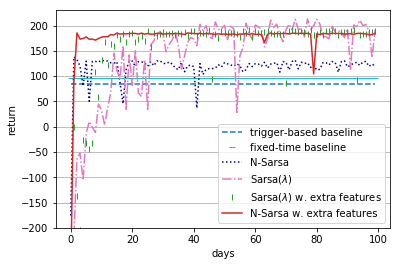

In [188]:
# Oven {Sarsa, Sarsa ExtraFeatures, etrace}

plt.plot(trigger_baseline_avg_o, '--', color='C0')
plt.plot(fixed_baseline_avg_o, '_', color='C9')
plt.plot(os_avg, ':', color='navy')
plt.plot(oe_avg, '-.', color='C6')
plt.plot(oee_avg, '|', color='C2')
plt.plot(ose_avg, '-', color='C3')
# plt.title('Oven Rule')
plt.legend(['trigger-based baseline', 'fixed-time baseline', 
            'N-Sarsa', 'Sarsa($\lambda$)',
            'Sarsa($\lambda$) w. extra features', 'N-Sarsa w. extra features'], loc='lower right')
plt.xlabel('days')
plt.ylabel('return')
ax = plt.gca()
ax.yaxis.grid(True)
ax.set_ylim(-200, 230)
plt.savefig('oven_1.pdf', format='pdf')
plt.show()


In [145]:
CUTOFF_C = 100
TRIGGER_BASED_BASELINE_REWARD_C = 87.5
FIXED_TIME_BASELINE_REWARD_C = -58.4

# Coffee Sarsa
cs0 = [-108.25, 49.25, -256.0, -127.0, -128.5, -122.5, -50.5, -46.0, -61.75, -37.0, -58.75, -64.75, -22.0, -33.25, -11.5, 7.25, 35.0, -484.5, -31.75, -48.25, -64.0, -0.25, -622.5, -125.5, -163.75, -123.25, -519.75, -91.75, -80.5, -125.5, -147.25, -56.5, -151.75, -44.5, -96.25, 44.75, -751.5, -110.5, -295.75, -169.75, -294.25, -266.5, -240.25, -229.0, -9.25, -275.5, -213.25, -275.5, -197.5, -235.75, -159.25, -178.0, -260.5, -211.0, -292.75, -216.25, -208.75, -179.5, -250.0, -191.5, -132.25, -237.25, -232.0, -244.75, -76.75, -295.75, -115.0, -226.0, -231.25, -265.0, -209.5, -232.75, -229.75, -186.25, -222.25, -233.5, -232.75, -281.5, -192.25, -250.0, -223.0, -262.75, -199.0, -165.25, -181.75, -165.25, -211.75, -216.25, -178.75, -226.75, -179.5, -221.5, -81.25, -205.75, -176.5, 16.25, -121.75, -250.0, -210.25, -191.5, -163.0, -212.5, -192.25, -204.25, -260.5, -213.25, -183.25, -233.5, -217.75, -190.75, -147.25, -177.25, -76.0, -207.25, -224.5, -157.75, -121.0, -194.5, -236.5, -200.5, -238.75, -141.25, -176.5, -216.25, -160.0, -163.75, -136.75, -435.25, -165.25, -286.0, -354.25, -185.5, -274.0, -269.5, -175.0, -376.75, -309.25, -346.0, -319.75, -298.0, -175.0, -372.25, -241.0, -356.5, -270.25, -385.0, -219.25, -326.5, -267.25, -361.0, -271.75, -313.75, -299.5, -322.0, -308.5, -237.25, -265.75, -152.5, -144.25, -150.25, -141.25, -299.5, -278.5, -265.75, -526.0, -235.0, -197.5, -277.75, -385.75, -258.25, -262.0, -266.5, -289.0, -370.0, -172.75, -347.5, -305.5, -325.0, -292.0, -352.75, -382.75, -385.0, -269.5, -293.5, -355.75, -293.5, -217.75, -296.5, -334.0, -257.5, -242.5, -335.5, -321.25, -328.75, -291.25, -357.25, -331.75, -325.75, -331.0, -347.5]
cs1 = [-102.25, 47.75, 93.5, 53.75, 23.0, 21.5, -288.25, -24.25, -61.0, -95.5, -698.25, -164.5, -235.75, -234.25, -189.25, -82.0, -192.25, -133.75, -192.25, -163.75, -113.5, -211.0, -194.5, -138.25, -97.0, -135.25, -157.0, -121.0, -198.25, -173.5, -21.25, -148.0, -9.25, -123.25, -505.75, -181.75, -225.25, -76.0, -152.5, -210.25, -256.0, -172.75, -84.25, -250.75, -529.75, -237.25, -297.25, -277.0, -268.0, -234.25, -263.5, -200.5, -298.75, -169.0, 35.0, -261.25, -215.5, -276.25, -233.5, -217.75, -309.25, -241.75, -278.5, -222.25, -74.5, -133.75, -175.75, -144.25, -226.75, -219.25, -241.0, -199.0, -234.25, -166.75, -232.0, -187.75, -124.75, -147.25, -234.25, -217.0, -178.0, -211.0, -155.5, -221.5, -141.25, -169.0, -252.25, -186.25, -266.5, -235.75, -149.5, -129.25, -207.25, -200.5, -46.0, -198.25, -184.75, -223.75, -123.25, -163.75, -417.25, -274.0, -248.5, -298.0, -151.75, -277.75, -337.0, -238.75, -379.0, -296.5, -358.0, -205.75, -295.75, -295.0, -312.25, -319.0, -337.0, -388.75, -261.25, -337.75, -396.25, -460.75, -442.0, -417.25, -474.25, -322.75, -302.5, -218.5, -528.25, -363.25, -325.75, -263.5, -394.75, -337.0, -230.5, -217.0, -179.5, -239.5, -261.25, -446.5, -392.5, -241.0, -493.0, -336.25, -467.5, -485.5, -517.0, -430.0, -230.5, -358.75, -244.75, -526.0, -260.5, -241.75, -427.75, -347.5, -393.25, -356.5, -409.75, -221.5, -446.5, -175.75, -376.75, -233.5, -229.75, -260.5, -493.75, -438.25, -277.0, -226.0, -319.0, -336.25, -436.0, -238.0, -238.75, -454.75, -305.5, -274.75, -376.0, -425.5, -221.5, -447.25, -301.0, -289.75, -413.5, -301.0, -375.25, -207.25, -447.25, -338.5, -375.25, -397.0, -251.5, -260.5, -405.25, -219.25, -406.75, -222.25, -340.75, -391.75]
cs2 = [-102.25, -242.5, -16.0, -66.25, -85.75, -10.75, 19.25, 29.75, -271.0, -44.5, -52.75, -165.25, -127.0, -214.0, -182.5, -122.5, -130.75, -128.5, -196.0, -160.0, -141.25, -151.75, -460.75, -152.5, -141.25, -236.5, -112.75, -138.25, -160.0, -205.75, -137.5, -137.5, -86.5, -67.75, -140.5, -127.75, -177.25, -157.75, 20.0, -238.75, -151.0, -209.5, -73.75, -145.0, -155.5, -154.75, -211.0, -166.75, -90.25, -42.25, -34.0, -103.75, -73.0, -103.0, -235.75, -119.5, -136.75, -118.75, -85.75, -124.75, -113.5, -116.5, -152.5, -179.5, -153.25, -140.5, -176.5, -124.75, -142.75, -94.75, -178.75, -164.5, -427.0, -248.5, -261.25, -266.5, -247.75, -224.5, -38.5, -190.0, -295.0, -158.5, -300.25, -247.0, -257.5, -306.25, -293.5, -246.25, -254.5, -215.5, -85.0, -187.0, -297.25, -214.75, -216.25, -221.5, -241.0, -127.0, -174.25, -286.75, -172.0, -151.75, -223.0, -247.75, -238.75, -169.75, -202.0, -234.25, -232.75, -261.25, -248.5, -180.25, -48.25, -195.25, -229.0, -281.5, -34.75, -169.75, -241.0, -262.0, -267.25, -244.0, -201.25, -84.25, -235.0, -248.5, 107.75, -203.5, -280.0, -210.25, -171.25, -253.0, -104.5, -298.0, -226.75, -234.25, -217.75, -247.75, -180.25, -193.75, -152.5, -77.5, 40.25, -1.0, -180.25, -189.25, -163.0, -156.25, -94.0, -151.0, -8.5, -200.5, -191.5, 77.75, -136.75, -139.0, -64.0, -184.0, -102.25, -175.75, -210.25, -138.25, -152.5, -207.25, -211.0, -133.0, -124.75, -188.5, -208.0, -249.25, -160.75, -177.25, -159.25, -195.25, -192.25, -146.5, -478.0, -169.0, -180.25, -99.25, -87.25, -537.25, -173.5, -127.0, -138.25, -178.0, -53.5, -269.5, -237.25, -209.5, -122.5, -217.75, 88.25, -248.5, -194.5, -199.75, -214.0, -280.75, -189.25, -253.0]
cs3 = [-93.25, 50.0, -259.0, 32.0, -44.5, -4.0, -429.25, -178.75, -85.75, -144.25, -143.5, -138.25, -163.75, -203.5, -64.75, -143.5, -248.5, -191.5, -110.5, -98.5, -34.75, -82.0, -174.25, -183.25, -199.0, -172.0, -82.75, -157.75, -135.25, -211.75, -175.0, -177.25, -99.25, -217.75, -232.75, -59.5, -202.75, -65.5, -127.0, -61.0, -100.75, -97.0, -136.75, -157.75, -136.75, -86.5, -74.5, -57.25, -27.25, -438.25, -256.0, -242.5, -213.25, -100.75, -255.25, -111.25, -140.5, -127.0, -162.25, -188.5, -627.75, -254.5, -202.75, -156.25, -181.0, -556.75, -247.0, -333.25, -280.0, -304.0, -284.5, -259.75, -313.0, -374.5, -316.75, -266.5, -334.75, -271.75, -230.5, -369.25, -232.0, -252.25, -572.5, -382.0, -453.25, -469.75, -277.75, -298.75, -379.75, -214.0, -402.25, -430.0, -415.75, -403.75, -422.5, -408.25, -294.25, -305.5, -319.0, -226.75, -411.25, -411.25, -275.5, -231.25, -161.5, -388.75, -220.75, -423.25, -370.75, -480.25, -403.0, -411.25, -321.25, -403.0, -372.25, -313.75, -417.25, -257.5, -437.5, -406.75, -415.75, -425.5, -448.0, -472.0, -369.25, -418.75, -448.0, -411.25, -457.75, -475.0, -412.0, -454.0, -389.5, -439.0, -403.75, -251.5, -214.0, -228.25, -443.5, -409.75, -226.75, -238.75, -219.25, -370.75, -505.75, -448.75, -368.5, -454.75, -354.25, -406.75, -442.75, -472.75, -366.25, -464.5, -326.5, -434.5, -308.5, -283.75, -418.0, -453.25, -227.5, -391.0, -264.25, -481.0, -457.75, -394.0, -292.75, -478.75, -405.25, -445.0, -442.75, -255.25, -272.5, -355.75, -475.0, -350.5, -460.75, -352.75, -342.25, -428.5, -340.75, -359.5, -417.25, -307.75, -208.75, -283.0, -164.5, -441.25, -281.5, -396.25, -422.5, -289.75, -410.5, -308.5, -460.75, -390.25, -468.25, -219.25, -444.25, -332.5]
cs4 = [-105.25, 96.5, 138.5, 146.75, -337.0, 7.25, -38.5, -533.25, -30.25, -13.75, -358.75, -184.0, -20.5, -379.0, -76.75, -170.5, -272.5, -203.5, -211.0, -175.75, -210.25, -234.25, -221.5, -228.25, -251.5, -292.0, -231.25, -174.25, -186.25, -259.75, -254.5, -128.5, -184.0, -252.25, -221.5, -192.25, -225.25, -214.75, -169.75, -262.75, -198.25, -181.75, -247.75, -181.0, -187.75, -235.75, -244.75, -151.0, -193.75, -177.25, -268.0, -246.25, -235.75, -248.5, -187.0, -247.75, -94.75, -76.0, -108.25, -112.75, -98.5, -112.0, -433.75, -250.0, -262.75, -235.0, -213.25, -158.5, -252.25, -202.0, -158.5, -206.5, -82.75, -204.25, -202.75, -248.5, -157.75, -244.75, -262.75, -255.25, -220.0, -250.0, -254.5, -223.0, -170.5, -123.25, -237.25, -213.25, -214.0, -154.75, -125.5, -203.5, -181.75, -156.25, -48.25, -529.75, -235.75, -226.0, -149.5, -175.0, -283.75, -220.75, -702.0, -391.75, -256.0, -237.25, -219.25, -352.75, -417.25, -385.75, -365.5, -412.0, -233.5, -404.5, -337.75, -367.0, -351.25, -277.75, -290.5, -203.5, -404.5, -359.5, -332.5, -376.75, -277.75, -325.75, -396.25, -387.25, -414.25, -308.5, -217.75, -257.5, -230.5, -274.75, -391.75, -130.0, -238.75, -304.75, -337.0, -338.5, -209.5, -377.5, -248.5, -395.5, -277.0, -275.5, -286.0, -312.25, -346.0, -278.5, -283.0, -325.0, -184.75, -159.25, -318.25, -229.75, -331.0, -328.0, -259.75, -289.75, -266.5, -247.0, -241.75, -307.0, -300.25, -211.75, -379.0, -308.5, -295.0, -268.0, -318.25, -275.5, -239.5, -357.25, -309.25, -265.0, -355.75, -672.0, -440.5, -403.0, -454.75, -408.25, -431.5, -457.0, -300.25, -405.25, -328.75, -483.25, -473.5, -294.25, -391.0, -444.25, -431.5, -445.75, -439.75, -309.25, -439.0, -452.5, -451.75, -487.0]
cs5 = [-96.25, -114.25, -169.75, -389.5, -255.25, -297.25, -287.5, -315.25, -296.5, -290.5, -275.5, -298.75, -289.0, -303.25, -236.5, -246.25, -267.25, -267.25, -253.75, -293.5, -177.25, -250.0, -100.75, -81.25, -106.75, -97.75, -124.0, -422.5, -124.75, -74.5, -49.0, -177.25, -116.5, -76.75, -502.0, -293.5, -204.25, -235.75, -208.0, -59.5, -219.25, -274.75, -198.25, -197.5, -185.5, -183.25, -169.75, -321.25, -216.25, -257.5, -403.75, -152.5, -233.5, -161.5, -238.0, -311.5, -244.0, -276.25, -142.0, -205.75, -178.75, -227.5, -213.25, -286.0, -249.25, -223.75, -262.0, -230.5, -202.75, -144.25, -340.75, -340.0, -285.25, -233.5, -199.0, -310.0, -154.0, -193.0, -260.5, -288.25, -729.75, -244.75, -299.5, -310.75, -390.25, -220.0, -310.0, -421.0, -334.0, -416.5, -303.25, -205.0, -313.0, -268.0, -360.25, -386.5, -388.0, -304.0, -309.25, -271.75, -159.25, -274.0, -292.75, -308.5, -356.5, -259.0, -412.75, -392.5, -319.75, -245.5, -303.25, -268.0, -197.5, -324.25, -202.0, -375.25, -259.0, -337.0, -226.75, -208.75, -375.25, -242.5, -219.25, -160.0, -342.25, -173.5, -202.75, -227.5, -238.0, -217.0, -129.25, -202.0, -201.25, -171.25, -324.25, -224.5, -162.25, -195.25, -177.25, -106.0, -108.25, -158.5, -335.5, -120.25, -239.5, -229.75, -234.25, -280.75, -145.75, -250.75, -135.25, -207.25, -219.25, -182.5, -351.25, -264.25, -182.5, -256.75, -239.5, -229.0, -262.75, -215.5, -389.5, -135.25, -183.25, -244.0, -239.5, -108.25, -292.0, -209.5, -170.5, -136.75, -148.75, -163.75, -77.5, -226.75, -166.0, -156.25, -262.75, -65.5, -139.75, -141.25, -124.75, -201.25, -154.75, -210.25, -202.0, -157.75, -208.0, -149.5, -260.5, -130.75, -163.0, -364.75, -150.25, -189.25, -244.75, -230.5, -218.5, -300.25]

# Coffee Sarsa ExtraFeatures
cse0 = [-324.75, -294.75, 181.25, 191.0, 191.0, 184.25, 183.5, 173.75, 182.0, 178.25, 171.5, 157.25, 168.5, 166.25, 149.75, 173.75, 146.75, 156.5, 158.75, 146.75, 164.0, 153.5, 149.0, 149.75, 136.25, 153.5, 140.75, 157.25, 164.0, 153.5, 172.25, 165.5, 146.0, 175.25, 170.75, 164.0, 164.0, 143.75, 188.75, 185.75, 187.25, 190.25, 189.5, 191.0, 169.25, 181.25, 153.5, 188.75, 164.75, 139.25, 182.0, 189.5, 187.25, 152.0, 161.75, 188.75, 171.5, 158.75, 170.0, 177.5, 132.5, 189.5, 189.5, 179.75, 181.25, 156.5, 178.25, 188.0, 164.75, 191.0, 155.0, 173.75, 164.0, 164.75, 170.0, 188.75, 185.0, 183.5, 176.0, 182.75, 171.5, 186.5, 191.0, 191.0, 185.0, 191.0, 187.25, 161.0, 184.25, 187.25, 182.0, 183.5, 191.0, 191.0, 191.0, 190.25, 183.5, 191.0, 185.0, 188.75, 183.5, 185.75, 180.5, 183.5, 179.75, 167.0, 137.75, 181.25, 169.25, 183.5, 162.5, 184.25, 182.75, 188.0, 184.25, 186.5, 185.0, 168.5, 191.0, 183.5, 173.75, 191.0, 191.0, 189.5, 191.0, 191.0, 191.0, 170.0, 191.0, 175.25, 177.5, 182.75, 191.0, 191.0, 174.5, 174.5, 184.25, 191.0, 191.0, 182.0, 179.75, 191.0, 184.25, 191.0, 170.0, 182.75, 176.75, 187.25, 191.0, 176.0, 191.0, 190.25, 191.0, 181.25, 191.0, 185.0, 191.0, 191.0, 182.75, 191.0, 188.0, 179.0, 160.25, 191.0, 180.5, 191.0, 185.75, 183.5, 191.0, 191.0, 191.0, 191.0, 183.5, 183.5, 171.5, 183.5, 191.0, 183.5, 181.25, 184.25, 190.25, 182.75, 191.0, 191.0, 191.0, 181.25, 191.0, 191.0, 191.0, 191.0, 182.0, 191.0, 191.0, 182.0, 182.0, 191.0, 191.0, 191.0, 191.0, 191.0]
cse1 = [-324.75, -285.0, 181.25, 180.5, 180.5, 180.5, 161.75, 164.75, 146.75, 153.5, 191.0, 177.5, 153.5, 149.75, 140.75, 136.25, 191.0, 161.0, 146.0, 170.75, 142.25, 159.5, -328.5, 140.0, 155.0, 138.5, 143.0, 134.0, 150.5, 152.0, 161.0, 158.75, 158.75, 158.0, 179.0, 177.5, 172.25, 175.25, 170.0, 179.75, 178.25, 179.0, 157.25, 171.5, 180.5, 179.0, 174.5, 178.25, 180.5, 181.25, 183.5, 170.0, 181.25, 175.25, 170.0, 164.75, 181.25, 176.75, 181.25, 173.75, 171.5, 177.5, 176.75, 167.75, 182.0, 180.5, 163.25, 181.25, 181.25, 183.5, 181.25, 173.75, 179.75, 182.75, 173.0, 181.25, 172.25, 182.75, 184.25, 169.25, 180.5, 182.75, 166.25, 184.25, 155.75, 183.5, 181.25, 176.0, 170.75, 186.5, 182.0, 183.5, 182.75, 180.5, 182.75, 185.0, 171.5, 181.25, 161.75, 180.5, 184.25, 182.75, 183.5, 172.25, 183.5, 169.25, 190.25, 183.5, 188.75, 190.25, 182.75, 191.0, 167.75, 183.5, 182.0, 182.0, -335.25, 183.5, 180.5, 190.25, 181.25, 180.5, 191.0, 132.5, 181.25, 182.0, 179.75, 182.0, 189.5, 182.0, 187.25, 191.0, 180.5, 189.5, 191.0, 185.75, 191.0, 181.25, 185.0, 182.0, 191.0, 181.25, 184.25, 191.0, 182.0, 191.0, 182.75, 191.0, 180.5, 147.5, 191.0, 182.0, 182.75, 191.0, 191.0, 191.0, 179.75, 190.25, 179.0, 181.25, 182.75, 183.5, 191.0, 189.5, 191.0, 191.0, 188.0, 182.75, 144.5, 191.0, 179.75, 181.25, 183.5, 182.0, 180.5, 185.0, 191.0, 191.0, 182.75, 182.0, 179.75, 182.75, 191.0, 182.0, 182.0, 184.25, 182.0, 182.75, 185.0, 191.0, 182.0, 191.0, 191.0, 191.0, 163.25, 179.75, 181.25, 180.5, 180.5, 191.0]
cse2 = [-314.25, 32.0, 191.75, 173.0, 191.0, 171.5, 170.0, 169.25, 182.75, 141.5, 167.75, 152.0, 150.5, 131.75, 135.5, 169.25, 132.5, 159.5, 161.0, 165.5, 154.25, 165.5, 167.75, 181.25, 143.0, 156.5, 151.25, 165.5, 104.0, 173.0, 173.75, 170.0, 185.0, 186.5, 186.5, 168.5, 167.75, 178.25, 189.5, 173.75, 158.75, 191.0, 164.0, 190.25, 179.0, 191.0, 149.0, 191.0, 191.0, 191.0, 190.25, 191.0, 176.0, 176.0, 161.0, 178.25, 177.5, 191.0, 173.75, 167.0, 171.5, 191.0, 173.75, 176.0, 183.5, 191.0, 188.0, 177.5, 155.75, 164.0, 162.5, 181.25, 182.75, 191.0, 191.0, 181.25, 191.0, 181.25, 191.0, 187.25, 184.25, 184.25, 191.0, 190.25, 189.5, 191.0, 180.5, 173.75, 182.75, 191.0, 176.0, 186.5, 191.0, 181.25, 191.0, 189.5, 191.0, 191.0, 191.0, 191.0, 188.75, 185.0, 191.0, 190.25, 187.25, 191.0, 191.0, 191.0, 187.25, 172.25, 191.0, -332.25, 188.75, 191.0, 191.0, 188.75, 191.0, 191.0, 191.0, 191.0, 191.0, 191.0, 188.75, 191.0, 187.25, 132.5, 190.25, 188.0, 188.0, 191.0, 191.0, 191.0, 191.0, 190.25, 191.0, 190.25, 191.0, 191.0, 191.0, 188.0, 189.5, 183.5, 191.0, 191.0, 191.0, 191.0, 191.0, 179.0, 190.25, 191.0, 191.0, 184.25, 191.0, 191.0, 191.0, 191.0, 188.0, 181.25, 182.0, 191.0, 191.0, 191.0, 191.0, 191.0, 191.0, 191.0, 191.0, 189.5, 190.25, 191.0, 191.0, 191.0, 176.75, 191.0, 191.0, 191.0, 191.75, 191.0, 185.0, 183.5, 191.0, 185.0, 180.5, 188.75, 191.0, 191.0, 180.5, 191.0, 191.0, 187.25, 191.0, 188.0, 191.0, 190.25, 189.5, 191.0, 190.25, 191.0, 191.0, 191.0]
cse3 = [-324.75, 191.0, -294.75, 182.75, 183.5, 183.5, 176.0, 179.75, 179.0, 178.25, 153.5, -345.0, 171.5, 173.0, 164.0, 154.25, 161.75, 155.75, 159.5, 149.75, 161.0, 154.25, 164.75, 163.25, 149.75, 137.0, 161.75, 173.0, 179.0, 170.75, 144.5, 163.25, 158.75, 112.25, 167.75, 163.25, 182.75, 159.5, 176.75, 182.75, 177.5, 187.25, 185.75, 147.5, 160.25, 188.0, 189.5, 190.25, 165.5, 185.0, 180.5, 162.5, 191.0, 189.5, 191.0, 191.0, 191.0, 188.75, 156.5, 160.25, 191.0, 183.5, 190.25, 159.5, 191.0, 188.75, 168.5, 185.0, 190.25, 183.5, 189.5, 188.0, 77.0, 167.75, 154.25, 171.5, 176.0, 190.25, 191.0, 188.0, 174.5, 146.75, 179.75, 182.0, 182.75, 184.25, 189.5, 150.5, 191.0, 191.0, 185.0, 191.0, 188.0, 185.75, 191.0, 186.5, 184.25, 190.25, 185.75, 178.25, 184.25, 190.25, 191.0, 191.0, 168.5, 189.5, 191.0, 190.25, 183.5, 181.25, 191.0, 184.25, 191.0, 155.75, 191.0, 182.75, 182.75, 191.0, 191.0, 189.5, 182.75, 191.0, 185.75, 185.75, 172.25, 177.5, 185.75, 189.5, 189.5, 185.0, 188.75, 185.75, 180.5, 190.25, 185.75, 179.75, 181.25, 185.0, 183.5, 190.25, 188.0, 148.25, 191.0, 188.75, 191.0, 191.0, 188.0, 174.5, 191.0, 183.5, 191.0, 186.5, 183.5, 186.5, 191.0, 190.25, 191.0, 188.0, 183.5, 184.25, 188.75, 190.25, 185.75, 182.0, 186.5, 191.0, 182.0, 191.0, 190.25, 188.75, 191.0, 185.0, 187.25, 190.25, 185.0, 191.0, 191.0, 182.75, 191.0, 191.0, 160.25, 191.0, 189.5, 191.0, 190.25, 188.75, 190.25, 190.25, 185.75, 189.5, 184.25, 189.5, 183.5, 186.5, 182.75, 183.5, 174.5, 182.75, 191.0, 191.0]
cse4 = [-324.75, -304.5, 181.25, -285.0, 182.0, 175.25, 191.0, 191.0, 158.0, -289.5, 164.0, 179.75, 191.0, 187.25, 179.0, 173.75, 168.5, 153.5, 148.25, 142.25, 147.5, 146.75, 158.0, 144.5, 137.75, 150.5, 122.0, 157.25, 165.5, 149.0, 151.25, 150.5, 145.25, 132.5, 155.75, 111.5, 167.75, 176.75, 180.5, 173.0, 161.75, 190.25, 148.25, 182.75, 165.5, 184.25, 182.0, 182.0, 155.75, 158.0, 181.25, 170.0, 177.5, 150.5, 164.75, 182.0, 182.0, 163.25, 182.0, 169.25, 182.0, 183.5, 184.25, 170.75, 183.5, 173.75, 183.5, 183.5, 167.75, 182.0, 170.75, 176.0, 178.25, 185.0, 182.75, 183.5, 179.75, 176.75, 182.0, 181.25, 181.25, 179.0, 183.5, 180.5, 173.0, 185.0, 164.0, 179.0, 166.25, 183.5, 176.75, 180.5, 182.75, 179.0, 185.0, 180.5, 181.25, 177.5, 182.75, 182.0, 180.5, 184.25, 182.0, 191.0, 184.25, 182.75, 182.75, 171.5, 183.5, 185.0, 183.5, 181.25, 175.25, 183.5, 188.0, 185.0, 178.25, 180.5, 178.25, 185.75, 188.75, 182.0, 184.25, 182.75, 191.0, 179.75, 182.0, 182.0, 182.0, 182.75, 184.25, 157.25, 179.75, 191.0, 182.0, 181.25, 182.0, 166.25, 181.25, 184.25, 172.25, 183.5, 182.75, 185.75, 183.5, 180.5, 182.0, 191.0, 191.0, 188.0, 182.0, 185.75, 180.5, 182.75, 182.75, 177.5, 182.0, 183.5, 185.0, 185.75, 181.25, 182.75, 182.0, 179.0, 180.5, 188.0, 182.75, 179.75, 188.0, 183.5, 191.0, 185.75, 187.25, 182.75, 184.25, 176.0, 184.25, 183.5, 191.0, 188.75, 168.5, 185.0, 175.25, 186.5, 185.0, 182.75, 183.5, 185.0, 185.75, 184.25, 183.5, 190.25, 182.75, 184.25, 184.25, 191.0, 179.0, 186.5, 191.0, 182.75]
cse5 = [-315.0, 192.5, 189.5, 179.0, 174.5, 182.0, 191.0, 165.5, 176.0, 167.0, 173.0, 174.5, 160.25, 191.0, 152.0, 151.25, 179.75, 191.0, 164.75, 165.5, 152.0, 173.0, 167.75, 173.75, 166.25, 158.75, 143.75, 147.5, 182.75, 167.75, 171.5, 154.25, 152.75, 158.0, 142.25, 159.5, 153.5, 162.5, 164.75, 110.0, 157.25, 161.0, 174.5, 171.5, 176.75, 177.5, 183.5, 158.75, 185.75, 178.25, 176.75, 186.5, 180.5, 178.25, 165.5, 163.25, 179.0, 184.25, 183.5, 149.75, 176.0, 167.75, 164.75, 180.5, 176.0, 184.25, 122.0, 181.25, 149.75, 185.75, 162.5, 176.75, 181.25, 182.75, 182.75, 185.0, 174.5, 179.0, 181.25, 179.0, 186.5, 183.5, 186.5, 179.0, 185.0, 184.25, 186.5, 189.5, 185.0, 149.75, 187.25, 181.25, 182.0, 182.0, 184.25, 190.25, 182.75, 191.0, 181.25, 184.25, 182.75, 191.0, 185.0, 183.5, 181.25, 183.5, 181.25, 181.25, 181.25, 191.0, 191.0, 182.0, 183.5, 185.75, 191.0, 182.0, 176.0, 184.25, 173.0, 191.0, 191.0, 175.25, 191.0, 185.0, 185.75, 183.5, 180.5, 182.75, 191.0, 182.0, 184.25, 178.25, 183.5, 182.0, 179.75, 185.0, 180.5, 182.75, 166.25, 183.5, 184.25, 190.25, 181.25, 191.0, 183.5, 191.0, 191.0, 180.5, 184.25, 191.0, 180.5, 182.0, 181.25, 172.25, 191.0, 180.5, 182.75, 182.75, 191.0, 191.0, 191.0, 180.5, 174.5, 182.75, 191.0, 169.25, 181.25, 191.0, 183.5, 182.75, 184.25, 191.0, 191.0, 191.0, 171.5, 185.0, 172.25, 190.25, 180.5, 182.75, 191.0, 182.75, 182.75, 191.0, 184.25, 191.0, 191.0, 189.5, 180.5, 191.0, 191.0, 191.0, 169.25, 191.0, 181.25, 183.5, 181.25, 183.5, 184.25, 186.5]

cs_data = [cs0, cs1, cs2, cs3, cs4, cs5]
cs_data = [np.array(d)[:CUTOFF_C] for d in cs_data]
cs_avg = sum(cs_data)/6

cse_data = [cse0, cse1, cse2, cse3, cse4, cse5]
cse_data = [np.array(d)[:CUTOFF_C] for d in cse_data]
cse_avg = sum(cse_data)/6

trigger_baseline_avg_c = [TRIGGER_BASED_BASELINE_REWARD_C] * len(oce0[:CUTOFF_C])
fixed_baseline_avg_c = [FIXED_TIME_BASELINE_REWARD_C] * len(oce0[:CUTOFF_C])


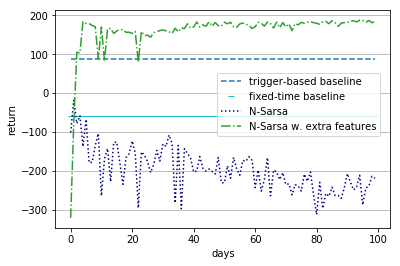

In [186]:
# Coffee {Sarsa, Sarsa ExtraFeatures}

plt.plot(trigger_baseline_avg_c, '--', color='C0')
plt.plot(fixed_baseline_avg_c, '_', color='C9')
plt.plot(cs_avg, ':', color='navy')
plt.plot(cse_avg, '-.', color='C2')
# plt.title('Coffee Rule')
plt.legend(['trigger-based baseline', 'fixed-time baseline', 'N-Sarsa', 'N-Sarsa w. extra features'], loc='lower right', bbox_to_anchor=(0.985,0.4)) # ex) bbox_to_anchor=(0.6,0.5)
plt.xlabel('days')
plt.ylabel('return')
ax = plt.gca()
ax.yaxis.grid(True)
plt.savefig('coffee_1.pdf', format='pdf')
plt.show()
